# Проект3: Исследование объявлений о продаже квартир



### Данные для проекта:

  Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет по данным сервиса Яндекс.Недвижимость.
  По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цели и задачи проекта:

1. Научиться определять рыночную стоимость объектов недвижимости.
2. Установить параметры для постороения автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность. 

### План проекта:

1. Изучить и описать наглядно следующие параметры квартир:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления.
        
2. Изучить, как быстро продавались квартиры - какие продажи можно считать быстрыми, а какие — необычно долгими.

3. Изучить и описать наглядно факторы, которые больше всего влияют на общую (полную) стоимость объекта. Показать зависимость цены от указанных ниже параметров:
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
        
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

5. Посчитать среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

### Обзор данных

Импортируем необходимые для проекта библиотеки:

In [1]:
import pandas as pd 
#импортируем библиотеку pandas для работы с таблицами
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
#импортируем библиотеки для построения графиков


Считываем файл с разрешением .csv, применяем разделение столбцов отступами:

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

Выводим первые 10 строк полученной таблицы:

In [3]:
data.head(10) 
#для вывода первых 10 строк таблицы используем метод head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получаем обобщенную информацию о таблице:

In [4]:
data.info()
#для получения обобщенной информации о данных в таблице используем метод info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для просмотра параметров исходных данных строим гистограммы для всех столбцов таблицы с данными:

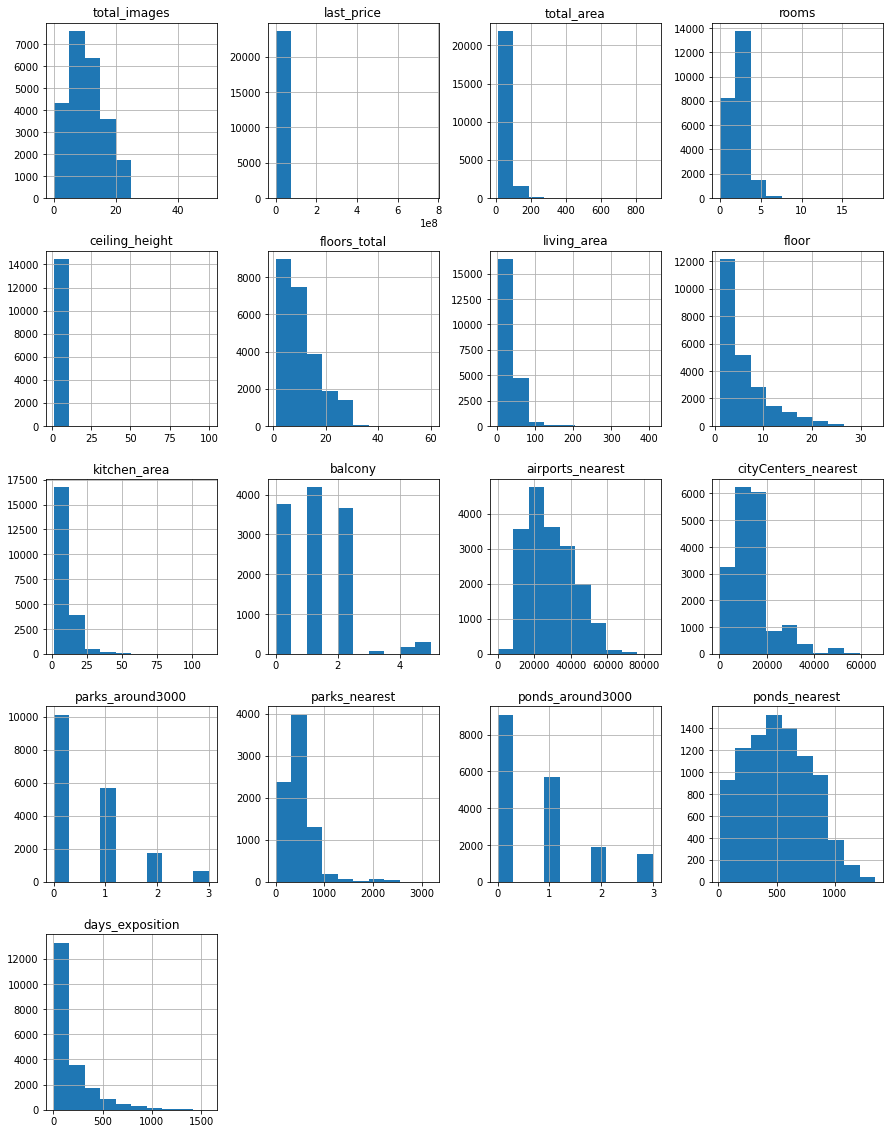

In [5]:
data.hist(figsize=(15, 20));
#для построения используем метод hist()

Вывод: в исходной таблице с данными 22 столбца, 14 из которых с пропусками значений, в 3 столбцах ('balcony', 'city_centers_nearest',
       'parks_nearest'),согласно гистограммам есть выбросы.

### Предобработка данных

#### Стиль заголовков

Просмотрим и отредактируем названия столбцов таблицы в соответсвии со "змеиным" регистром:

In [6]:
display(data.columns)
#вызываем перечень названий столбцов таблицы data методом .columns
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}) 
#отредактируем название столбца cityCenters_nearest - все символы сделав строчными
data.columns 
#выведем информацию повторно для проверки


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Пропуски значений

Выводим информацию о всех пропусках:

In [7]:
data.isnull().sum().sort_values(ascending=False)
#для вывода информации о пропусках и их количествах используем методы isnull() и sum() 

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

По столбцу 'is_apartment' много пропусков - 20924 из 23699, при этом можно предположить что продавцы квартир не стали заполнять эту информацию, т.к. продают квартиры, а не аппартаменты. Соответсвенно заменим данные пропуски на False.

Узнаем уникальные значения столбца 'is_apartment':

In [9]:
data['is_apartment'].unique()
# для отображения уникальных значений применим метод unique()

array([nan, False, True], dtype=object)

Заменим пропуски на "False", т.к. судя по количеству пропусков -скорее всего продавцы квартир не отметили тип продаваемой недвижимости:


In [10]:
data['is_apartment'] = data['is_apartment'].fillna('False') 
#для замены пропусков применим метод fillna()

По столбцу 'balcony' есть пропуски, можно предположить что продавцы не стали указывать информацию об отсутствии балконов, поменяем пропуски на число 0:

In [11]:
data['balcony'].value_counts()
# применим метод value_counts() для подсчета суммы уникальных значений я ячейке 

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [12]:
data['balcony'] = data['balcony'].fillna(0) 
#применим метод fillna() для замены пропусков на число 0

Повторно проверяем пропуски:

In [13]:
data.isnull().sum().sort_values(ascending=False)
#используем вместе методы isnull() и sum() 

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Вывод: необходимые пропуски заполнены, по остальным столбам пропуски оставляем, т.к логичную замену предложить невозможно.

### Изменение типов данных

Меняем типы данных в тех столбцах, в которых можем:
last_price, floors_total и balcony на(int), first_day_exposition на (datetime), is_apartmentна (bool), 

Замена типа данных с дробного числа 'Float' на целое 'Int' т.к. в столбцах 'last_price' и 'balcony' представлены только целые числа:

In [14]:
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].astype(int)
#для замены типа данных используем метод astype()

Количество пропусков в столбце 'floors_total' не значительное, поменяем тип данных на Int c удалением пропусков:

In [15]:
data = data.dropna(subset=['floors_total'])
#удаление пропусков проводим методом dropna()

In [16]:
data['floors_total'] = data['floors_total'].astype(int)
#для замены типа данных используем метод astype()

Замена типа данных на datetime в столбце 'first_day_exposition':

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') 
#для замены используем метод to_datetime()

Замена типа данных на булево значение в столбце 'is_apartment'

In [18]:
data['is_apartment'] = data['is_apartment'].astype(bool) 
#для замены типа данных используем метод astype()

Проводим проверку проведенных изменений типов данных:

In [19]:
data.info()
#используем метод info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

Вывод: требуемые изменения по типам данных проведены успешно.

### Устранение дубликатов


Выводим информацию о явных дубликатах:

In [20]:
data.duplicated().sum()
#для выводы информации о явных дубликатах используем методы duplicated() и sum()


0

Вывод: явных дубликатов нет, переходим к отработке неявных дубликатов.

Выводим уникальные значения названий населенных пунктов:

In [21]:
data['locality_name'].sort_values().unique() 
#для вывода уникальных значений и их сортировки используем вместе два метода sort_values() и unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [22]:
data = data.dropna(subset=['locality_name'])
#удаление пропусков проводим методом dropna()

In [23]:
data['locality_name'].isna().sum()
#проверяем пропуски

0

In [24]:
# check
data.locality_name.nunique()

364

Некоторые аналогичные название содержат буквы 'ё' и 'е', заменим в них букву 'ё' на 'е':

In [25]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') 
#для замены букв применяем метод str.replace()

In [26]:
# check
data.locality_name.nunique()

330

Заменяем дублирующие значения населенных пунктов - деревня Кудрово на Кудрово и название посeлок Пансионат Зелeный Бор:

In [27]:
data['locality_name'] = data['locality_name'].replace('посeлок Пансионат Зелeный Бор', 'поселок Пансионат Зелeный Бор') 
#для замены применяем метод replace()

In [28]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово') 
#для замены применяем метод replace()

С помощью регулярных выражений заменяем обозначения населенных пунктов, избавляясь от неявных дубликатов сохраняя данные в прежнем названии столбца data['locality_name']:

In [29]:
to_replace = {
    r'(\b)посёлок(\b)':r'поселок',
    r'(\b)поселок городского типа(\b)':r'ПГТ',    
    r'(\b)городской поселок(\b)':r'ПГТ',
    r'(\b)коттеджный поселок(\b)':r'поселок'
}

data['locality_name'] = data['locality_name'].replace(to_replace, regex=True)
#для замены применяем метод replace()

Выводим уникальные значения названий населенных пунктов повторно для проверки удаления неявных дубликатов:

In [30]:
data['locality_name'].sort_values().unique() 
#для вывода уникальных значений и их сортировки используем вместе два метода sort_values() и unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'ПГТ Большая Ижора', 'ПГТ Будогощь',
       'ПГТ Важины', 'ПГТ Виллози', 'ПГТ Вознесенье', 'ПГТ Вырица',
       'ПГТ Дружная Горка', 'ПГТ Дубровка', 'ПГТ Ефимовский',
       'ПГТ Кондратьево', 'ПГТ Красный Бор', 'ПГТ Кузнечное',
       'ПГТ Кузьмоловский', 'ПГТ Лебяжье', 'ПГТ Лесогорский', 'ПГТ Мга',
       'ПГТ Назия', 'ПГТ Никольский', 'ПГТ Новоселье', 'ПГТ Павлово',
       'ПГТ Приладожский', 'ПГТ Рахья', 'ПГТ Рощино', 'ПГТ Рябово',
       'ПГТ Свирьстрой', 'ПГТ Сиверский', 'ПГТ Синявино', 'ПГТ Советский',
       'ПГТ Тайцы', 'ПГТ Токсово', 'ПГТ Ульяновка', 'ПГТ Федоровское',
       'ПГТ Форносово', 'ПГТ Янино-1', 'ПГТ имен

Действительно, особой необходимости в замене  data['locality_name'] на  data['locality_name2'] оставил прежнее название столбца

### Устранение редких и выбивающихся значений (аномалии) во всех столбцах

#### Посмотрим общую информацию об анамалиях

In [31]:
data.describe() 
#чтобы узнать распределение данных в каждом столбце вызываем метод describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывод: в столбцах  'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'days_exposition' есть аномальные значения, изучим и удалим их.

In [32]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Удаление аномалий в 'last_price'

Рассмотрим аномалии на гистограмме

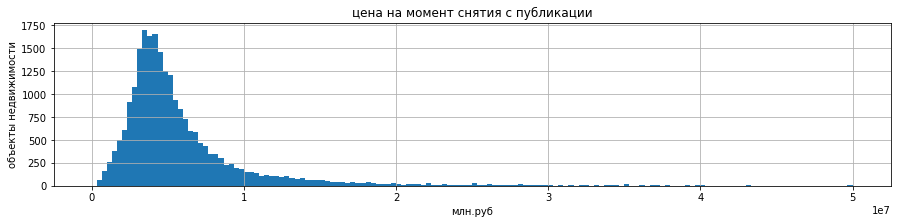

In [33]:
data['last_price'].hist(bins = 150, figsize = (15,3), range = (0, 50000000));
plt.title('цена на момент снятия с публикации')
plt.xlabel('млн.руб')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Посчитаем сколько в выборке слишком дорогих квартир более 45 млн.руб. и слишком дешёвых менее 100 тыс. руб.:

In [34]:
len(data.query('last_price  >= 45000000'))

164

In [35]:
len(data.query('last_price  <= 100000'))

1

Вывод: в выборку слишком дорогих и слишком дешёвых квартир попало 165 квартиры, что менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы.

In [36]:
data = data.query('~(last_price >= 45000000)')
data = data.query('~(last_price <= 100000)')
#удаляем выбросы, сохраняя значения NaN

In [37]:
data.info()
#методом info() проверяем количество удаленных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23400 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23400 non-null  int64         
 1   last_price            23400 non-null  int64         
 2   total_area            23400 non-null  float64       
 3   first_day_exposition  23400 non-null  datetime64[ns]
 4   rooms                 23400 non-null  int64         
 5   ceiling_height        14372 non-null  float64       
 6   floors_total          23400 non-null  int64         
 7   living_area           21555 non-null  float64       
 8   floor                 23400 non-null  int64         
 9   is_apartment          23400 non-null  bool          
 10  studio                23400 non-null  bool          
 11  open_plan             23400 non-null  bool          
 12  kitchen_area          21199 non-null  float64       
 13  balcony         

In [38]:
data['last_price'].describe()
#методом describe() проверяем значения

count    2.340000e+04
mean     5.935899e+06
std      4.719951e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.450000e+07
Name: last_price, dtype: float64

Вывод: выбросы по стоимости квартир в столбце 'last_price' удалены.

####  Удаление аномалий в  'total_area' 

Рассмотрим аномалии на гистограмме

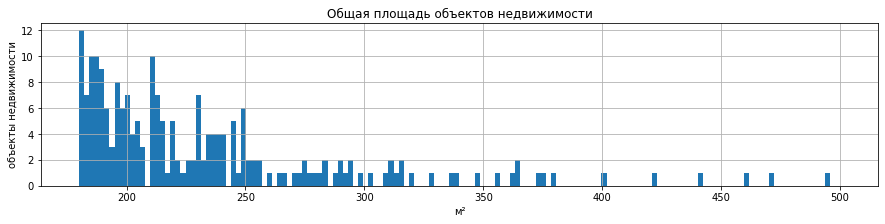

In [39]:
data['total_area'].hist(bins = 150, figsize = (15,3), range = (180,500));
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Посчитаем сколько в выборке слишком маленьких квартир (менее 20 квадратных метров) и слишком больших (более 250 квадратных метров):

In [40]:
len(data.query('total_area <= 20'))

35

In [41]:
len(data.query('total_area >= 250'))

54

Вывод: в выборку слишком маленьких квартир (менее 20 квадратных метров) и слишком больших (более 250 квадратных метров) попало 89 квартир, что менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы.

In [42]:
data = data.query('~(total_area <= 20)')
data = data.query('~(total_area >= 250)')
#удаляем выбросы, сохраняя значения NaN

In [43]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23311 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23311 non-null  int64         
 1   last_price            23311 non-null  int64         
 2   total_area            23311 non-null  float64       
 3   first_day_exposition  23311 non-null  datetime64[ns]
 4   rooms                 23311 non-null  int64         
 5   ceiling_height        14323 non-null  float64       
 6   floors_total          23311 non-null  int64         
 7   living_area           21485 non-null  float64       
 8   floor                 23311 non-null  int64         
 9   is_apartment          23311 non-null  bool          
 10  studio                23311 non-null  bool          
 11  open_plan             23311 non-null  bool          
 12  kitchen_area          21145 non-null  float64       
 13  balcony         

In [44]:
data['total_area'].describe()
#методом describe() проверяем значения

count    23311.000000
mean        58.493044
std         27.699865
min         20.100000
25%         40.000000
50%         52.000000
75%         68.950000
max        249.900000
Name: total_area, dtype: float64

Вывод: выбросы по площади квартир в столбце 'total_area' удалены.

#### Удаление аномалий в 'rooms'

Рассмотрим распределение комнат

In [45]:
data['rooms'].value_counts()
#посчитаем методом value_counts() распределение по комнатам

1     7979
2     7885
3     5734
4     1126
5      278
0      183
6       78
7       35
8        7
9        2
11       2
10       1
14       1
Name: rooms, dtype: int64

In [46]:
len(data.query('rooms >= 7')) 
#делаем срез значений по потолкам менее 2 метров

48

Вывод: в выборку c большим количеством комнат попало 48 квартир, что менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы.

In [47]:
data = data.loc[(data['rooms'] <= 7)]
#удаляем выбросы оператором loc()

In [48]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23298 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23298 non-null  int64         
 1   last_price            23298 non-null  int64         
 2   total_area            23298 non-null  float64       
 3   first_day_exposition  23298 non-null  datetime64[ns]
 4   rooms                 23298 non-null  int64         
 5   ceiling_height        14313 non-null  float64       
 6   floors_total          23298 non-null  int64         
 7   living_area           21473 non-null  float64       
 8   floor                 23298 non-null  int64         
 9   is_apartment          23298 non-null  bool          
 10  studio                23298 non-null  bool          
 11  open_plan             23298 non-null  bool          
 12  kitchen_area          21134 non-null  float64       
 13  balcony         

In [49]:
data['rooms'].describe()
#методом describe() проверяем значения

count    23298.000000
mean         2.041291
std          1.005080
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Вывод: выбросы по количеству комнат в квартире в  столбце 'rooms' удалены.

#### Удаление аномалий в 'ceiling_height'

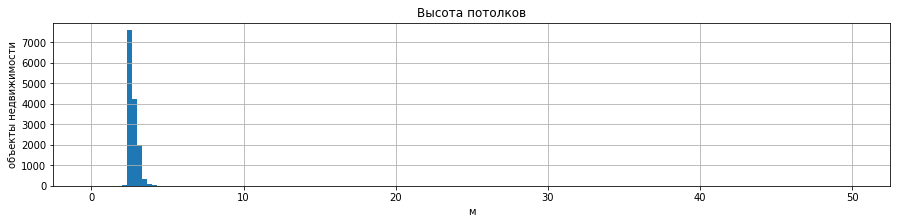

In [50]:
data['ceiling_height'].hist(bins = 150, figsize = (15,3), range = (0,50));
plt.title('Высота потолков')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

In [51]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   2.61,   3.2 ,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.5 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.86,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
         3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,   2.68,
      

Значения потолков более 14 метров и менее 1.5 метра являются выбросами, оценим их количество и удалим

In [52]:
len(data.query('ceiling_height >= 14'))

24

In [53]:
len(data.query('ceiling_height <= 1.5'))

2

In [54]:
data = data.query('~(ceiling_height >= 14)')
#все значения потолка больше 14 метров - выбросы, удаляем их, оставляя значения NaN

In [55]:
data = data.query('~(ceiling_height <= 1.5)')
#все значения потолка меньше 1.5 метров - выбросы, удаляем их, оставляя значения NaN

In [56]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  2.61,  3.2 ,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,
        3.18,  3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,
        3.83,  3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.86,  3.08,  3.68,  3.07,
        3.37,  3.09,  8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,
        4.37,  2.68,  3.9 ,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,
        3.33,  3.63,  3.14,  3.32,  8.3 ,  2.98,  2.86,  3.17,  3.28,
        3.04,  4.45,

In [57]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23272 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23272 non-null  int64         
 1   last_price            23272 non-null  int64         
 2   total_area            23272 non-null  float64       
 3   first_day_exposition  23272 non-null  datetime64[ns]
 4   rooms                 23272 non-null  int64         
 5   ceiling_height        14287 non-null  float64       
 6   floors_total          23272 non-null  int64         
 7   living_area           21447 non-null  float64       
 8   floor                 23272 non-null  int64         
 9   is_apartment          23272 non-null  bool          
 10  studio                23272 non-null  bool          
 11  open_plan             23272 non-null  bool          
 12  kitchen_area          21112 non-null  float64       
 13  balcony         

In [58]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  2.61,  3.2 ,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,
        3.18,  3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,
        3.83,  3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.86,  3.08,  3.68,  3.07,
        3.37,  3.09,  8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,
        4.37,  2.68,  3.9 ,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,
        3.33,  3.63,  3.14,  3.32,  8.3 ,  2.98,  2.86,  3.17,  3.28,
        3.04,  4.45,

In [59]:
data['ceiling_height'].describe()
#методом describe() проверяем значения

count    14287.000000
mean         2.721516
std          0.287635
min          1.750000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

Вывод: выбросы по высоте потолка в столбце 'ceiling_height' удалены в количестве 26 шт.

#### Удаление аномалий в 'floors_total'

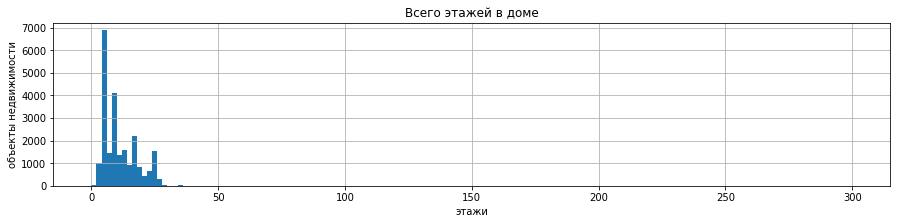

In [60]:
data['floors_total'].hist(bins = 150, figsize = (15,3), range = (0,300));
plt.title('Всего этажей в доме')
plt.xlabel('этажи')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

In [61]:
data['floors_total'].value_counts()
#посчитаем методом value_counts() распределение по этажности

5     5704
9     3736
16    1371
12    1352
10    1166
4     1165
25    1072
6      865
17     828
3      649
7      564
14     550
18     504
24     461
2      373
15     365
8      358
23     348
19     336
22     285
20     268
13     227
11     201
27     164
21     158
26     124
1       25
35      24
28      21
36       2
52       1
34       1
60       1
29       1
33       1
37       1
Name: floors_total, dtype: int64

Вывод: дома ниже 2 этажей и выше 36 этаже - скорее аномальное значение, и составляют менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы

In [62]:
data = data.loc[(data['floors_total'] <= 36)&(data['floors_total'] > 1)]
#удаляем выбросы оператором loc(), значений NaN в данном столбе нет

In [63]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23244 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23244 non-null  int64         
 1   last_price            23244 non-null  int64         
 2   total_area            23244 non-null  float64       
 3   first_day_exposition  23244 non-null  datetime64[ns]
 4   rooms                 23244 non-null  int64         
 5   ceiling_height        14274 non-null  float64       
 6   floors_total          23244 non-null  int64         
 7   living_area           21424 non-null  float64       
 8   floor                 23244 non-null  int64         
 9   is_apartment          23244 non-null  bool          
 10  studio                23244 non-null  bool          
 11  open_plan             23244 non-null  bool          
 12  kitchen_area          21090 non-null  float64       
 13  balcony         

In [64]:
data['floors_total'].describe()
#методом describe() проверяем значения

count    23244.000000
mean        10.723283
std          6.586091
min          2.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Вывод: выбросы по высоте потолка в столбце 'floors_total' удалены.

#### Удаление аномалий в  'living_area'

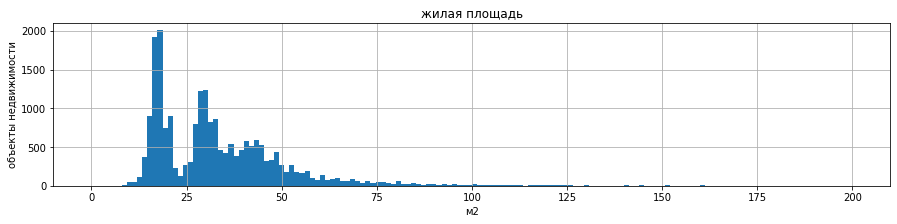

In [65]:
data['living_area'].hist(bins = 150, figsize = (15,3), range = (0,200));
plt.title('жилая площадь')
plt.xlabel('м2')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Посчитаем сколько в выборке слишком маленьких жилых площадей (менее 10 квадратных метров) и слишком больших (более 120 квадратных метров):

In [66]:
len(data.query('living_area  <= 10'))

50

In [67]:
len(data.query('living_area  >= 120'))

98

Вывод: в выборку слишком маленьких жилых площадей (менее 10 квадратных метров) и слишком больших (более 120 квадратных метров) попала 184 квартиры, что менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы.

In [68]:
data = data.query('~(living_area  <= 10)')
data = data.query('~(living_area  >= 120)')
#удаляем выбросы, сохраняя значения NaN

In [69]:
# check
data.shape[0]

23096

In [70]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23096 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23096 non-null  int64         
 1   last_price            23096 non-null  int64         
 2   total_area            23096 non-null  float64       
 3   first_day_exposition  23096 non-null  datetime64[ns]
 4   rooms                 23096 non-null  int64         
 5   ceiling_height        14172 non-null  float64       
 6   floors_total          23096 non-null  int64         
 7   living_area           21276 non-null  float64       
 8   floor                 23096 non-null  int64         
 9   is_apartment          23096 non-null  bool          
 10  studio                23096 non-null  bool          
 11  open_plan             23096 non-null  bool          
 12  kitchen_area          20955 non-null  float64       
 13  balcony         

In [71]:
data['living_area'].describe()
#методом describe() проверяем значения

count    21276.000000
mean        32.998127
std         16.550168
min         10.080000
25%         18.600000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

Вывод: выбросы по высоте потолка в столбце 'living_area' удалены.

#### Удаление аномалий в 'kitchen_area'

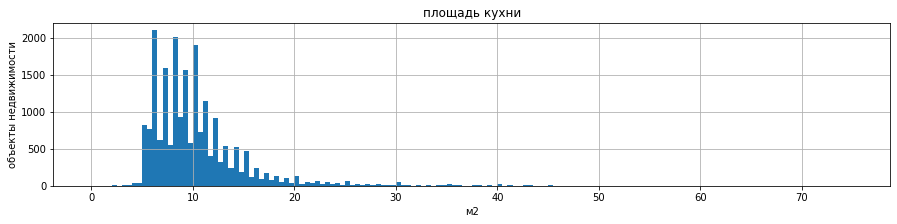

In [72]:
data['kitchen_area'].hist(bins = 150, figsize = (15,3), range = (0,75));
plt.title('площадь кухни')
plt.xlabel('м2')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Посчитаем сколько в выборке слишком маленьких кухонных площадей (менее 3 квадратных метров) и слишком больших (более 35 квадратных метров):

In [73]:
len(data.query('kitchen_area  >= 50'))

23

In [74]:
len(data.query('kitchen_area  <= 3'))

13

Вывод: в выборку слишком маленьких кухонных площадей слишком больших (более 50 квадратных метров) попало менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы.

In [75]:
data = data.query('~(kitchen_area  >= 50)')
data = data.query('~(kitchen_area  <= 3)')
#удаляем выбросы, сохраняя значения NaN

In [76]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23060 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23060 non-null  int64         
 1   last_price            23060 non-null  int64         
 2   total_area            23060 non-null  float64       
 3   first_day_exposition  23060 non-null  datetime64[ns]
 4   rooms                 23060 non-null  int64         
 5   ceiling_height        14147 non-null  float64       
 6   floors_total          23060 non-null  int64         
 7   living_area           21241 non-null  float64       
 8   floor                 23060 non-null  int64         
 9   is_apartment          23060 non-null  bool          
 10  studio                23060 non-null  bool          
 11  open_plan             23060 non-null  bool          
 12  kitchen_area          20919 non-null  float64       
 13  balcony         

In [77]:
data['kitchen_area'].describe()
#методом describe() проверяем значения

count    20919.000000
mean        10.256234
std          4.894840
min          3.200000
25%          7.000000
50%          9.000000
75%         11.800000
max         49.400000
Name: kitchen_area, dtype: float64

Вывод: выбросы по высоте потолка в столбце 'kitchen_area' удалены.

#### Удаление аномалий в 'days_exposition'  

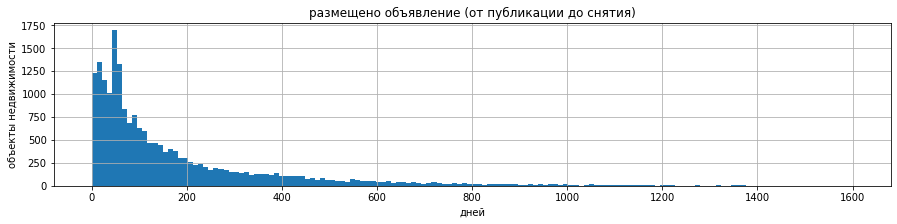

In [78]:
data['days_exposition'].hist(bins = 150, figsize = (15,3), range = (0,1600));
plt.title('размещено объявление (от публикации до снятия)')
plt.xlabel('дней')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Посчитаем сколько в выборке долгих публикаций - более 1200 дней и слишком коротких (менее 2 дней):

In [79]:
len(data.query('days_exposition >= 1200'))

85

In [80]:
len(data.query('days_exposition <= 2'))

4

Вывод: в выборку слишком публикаций объявлений попало 89 квартир, что менее 1% от общего количества, удалим данные квартиры из таблицы как выбросы.

In [81]:
data = data.query('~(days_exposition >= 1200)')
data = data.query('~(days_exposition <= 2)')
#удаляем выбросы, сохраняя значения NaN

In [82]:
data['days_exposition'].describe()
#методом describe() проверяем значения

count    19898.000000
mean       174.397025
std        205.151767
min          3.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1199.000000
Name: days_exposition, dtype: float64

Вывод: выбросы по периоду публикации объявлений в столбце 'days_exposition' удалены.

In [83]:
data.info()
#проверяем количество срезанных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22971 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22971 non-null  int64         
 1   last_price            22971 non-null  int64         
 2   total_area            22971 non-null  float64       
 3   first_day_exposition  22971 non-null  datetime64[ns]
 4   rooms                 22971 non-null  int64         
 5   ceiling_height        14082 non-null  float64       
 6   floors_total          22971 non-null  int64         
 7   living_area           21159 non-null  float64       
 8   floor                 22971 non-null  int64         
 9   is_apartment          22971 non-null  bool          
 10  studio                22971 non-null  bool          
 11  open_plan             22971 non-null  bool          
 12  kitchen_area          20834 non-null  float64       
 13  balcony         

In [84]:
print('удалено значений:', 23699-22971) #удалено 728 значений строк в качестве выбросов (или около 3%) от всей таблицы

удалено значений: 728


Вывод анамальные значения удалены в пределах допустимого значения.

Вывод по предобработке данных:
1. Получены исходные данные для исследования, постороены гистограммы;
2. Определены и заполнены пропущенные значения в столбцах 'is_apartment' и 'balcony';
3. Изменены типы данных в столбцах 'last_price' и 'balcony' на (int), 'first_day_exposition' на (datetime), 'is_apartment' на (bool), приведены пояснения;
4. Явных дубликатов не выявлено, устранены неявные дубликаты в названиях населённых пунктов;
5. Выявлены и устранены редкие и выбивающиеся значения (аномалии) в столбце 'ceiling_height'.

### Посчитаем и добавим в таблицу новые столбцы

#### Добавим в таблицу столбец с ценой за один квадратный метр и выведем результат

In [85]:
data['price_for_1m2'] = data['last_price']/data['total_area'] #добавим столбец и вычислим цену одного квадратного метра
data['price_for_1m2'] = data['price_for_1m2'].round() #округлим, убрав информацию по копейках


#### Добавим столбцы - день, месяц и год публикации объявления:

In [86]:
data['dayweek_exposition'] = data['first_day_exposition'].dt.weekday #добавляем день недели 
data['month_exposition'] = data['first_day_exposition'].dt.month #добавляем месяц 
data['year_exposition'] = data['first_day_exposition'].dt.year #добавляем год


#### Добавляем в таблицу столбец с типом этажа квартиры (где значения — «первый», «последний», «другой»)

Проверим есть ли в столбцах 'floor' и 'floors_total' отрицательные или нулевые значения этажей

In [87]:
data['floor'].value_counts()
#используем value_counts() для подсчета

2     3258
3     2983
1     2829
4     2691
5     2536
6     1258
7     1177
8     1055
9     1037
10     675
11     513
12     511
13     369
15     334
14     330
16     309
17     220
18     170
19     142
21     117
22     109
20     107
23      97
24      61
25      43
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

In [88]:
data['floors_total'].value_counts()
#используем value_counts() для подсчета

5     5628
9     3721
16    1359
12    1349
10    1159
4     1144
25    1065
17     823
6      820
3      642
7      548
14     545
18     498
24     459
2      371
15     363
8      347
23     340
19     330
22     282
20     266
13     223
11     199
27     161
21     156
26     123
35      24
28      21
36       2
34       1
33       1
29       1
Name: floors_total, dtype: int64

Вывод:нулевы значения в столбцах 'floor' и 'floors_total' отсутсвуют, применяем функцию:

In [89]:
def floor_category(row): # добавим функцию которая бы выбирала типы этажности
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_category, axis=1) #добавим столбец   

#### Добавляем в столбец расстояние в км до центра города

In [90]:
data['distance_to_citycenter,km'] = (data['city_centers_nearest']/1000).round()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,dayweek_exposition,month_exposition,year_exposition,floor_type,"distance_to_citycenter,km"
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95066.0,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72491.0,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.0,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44092.0,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.0,1,3,2017,другой,10.0


Вывод: все необходимые столбцы для исследования добавлены

### Проведем исследовательский анализ данных

#### Изучение параметров квартир. Общая площадь.

In [91]:
data['total_area'].describe() 
# Вызовем describe () для отображения статистики

count    22971.000000
mean        57.717637
std         25.670652
min         20.100000
25%         40.000000
50%         51.500000
75%         68.000000
max        240.000000
Name: total_area, dtype: float64

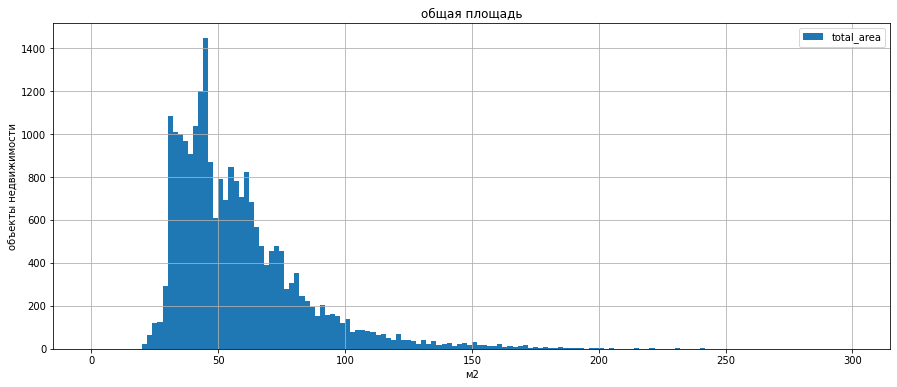

In [92]:
data['total_area'].hist(bins = 150, figsize = (15,6), range = (0, 300), legend=True); 
plt.title('общая площадь')
plt.xlabel('м2')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()


Вывод: на рынке недвижимости Санкт-Петербурга и соседних населённых пунктах в сервисе Яндекс.Недвижимость представлены квартиры общей площадью от 20 до 240 квадратных метров в количестве 22971 шт., наибольшее число квартир имеет общую площадь порядка 47 квадратных метров, при этом медиана равна 52 квадратным метрам, среднее значение общей площади стоставляет 58 квадратных метра.
    

#### Изучение параметров квартир. Жилая площадь.

In [93]:
data['living_area'].describe() 
# Вызовем describe () для отображения статистики

count    21159.000000
mean        32.947544
std         16.514676
min         10.080000
25%         18.600000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

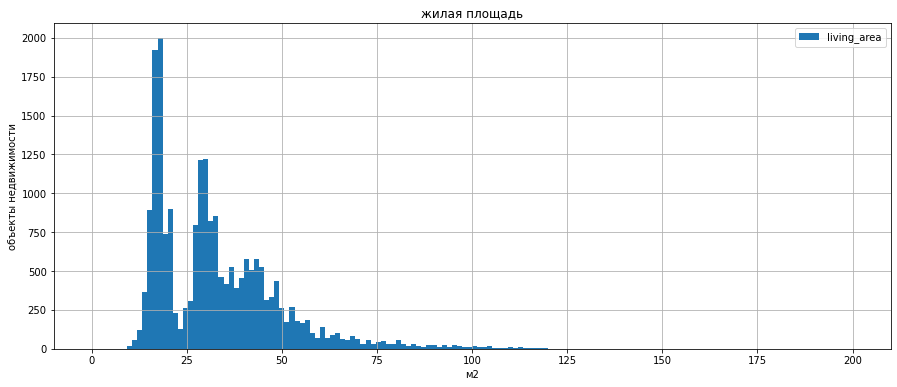

In [94]:
data['living_area'].hist(bins = 150, figsize = (15,6), range = (0, 200), legend=True); 
plt.title('жилая площадь')
plt.xlabel('м2')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Вывод: из представленных объектов недвижимости, жилую площадь имеют 21159 квартир, которая составляет от 10 до 119 квадратных метров, наибольшее число из представленных квартир имеют жилую площадь около 18 квадратных метров, при этом медиана равна 30 квадратным метрам, среднее значение жилой площади стоставляет 33 квадратных метра. 

#### Изучение параметров квартир. Площадь кухни.

In [95]:
data['kitchen_area'].describe()
# Вызовем describe () для отображения статистики

count    20834.000000
mean        10.248137
std          4.887346
min          3.200000
25%          7.000000
50%          9.000000
75%         11.780000
max         49.400000
Name: kitchen_area, dtype: float64

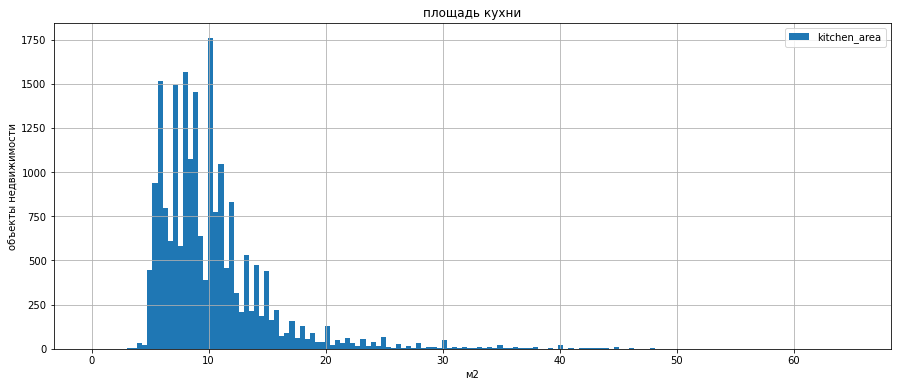

In [96]:
data['kitchen_area'].hist(bins = 150, figsize = (15,6), range = (0, 65), legend=True); 
plt.title('площадь кухни')
plt.xlabel('м2')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Вывод: из представленных объектов недвижимости, наибольшее число квартир имеют площадь кухонной зоны 10 квадратных метров, при этом медиана равна 9.0 квадратным метрам, среднее значение 10.2 квадратных метров. 

#### Изучение параметров квартир. Цена объекта.

Переведем цены объектов в млн.руб. и округлим:

In [97]:
data['last_price'] = (data['last_price']/1000).round(2) 

In [98]:
data['last_price'].describe()
# Вызовем describe () для отображения статистики

count    22971.000000
mean      5789.044145
std       4360.412224
min        430.000000
25%       3400.000000
50%       4600.000000
75%       6600.000000
max      44500.000000
Name: last_price, dtype: float64

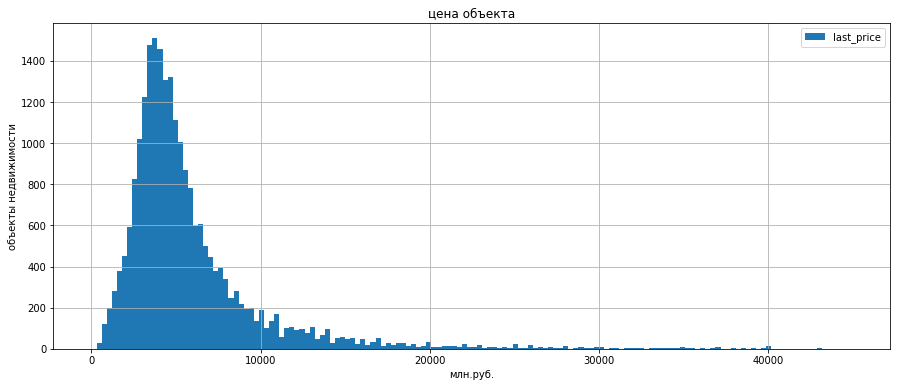

In [99]:
data['last_price'].hist(bins = 150, figsize = (15,6), range = (0, 45000), legend=True); 
plt.title('цена объекта')
plt.xlabel('млн.руб.')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Вывод: из представленных объектов недвижимости, наибольшее число квартир продаётся по стоимости от 3.5 до 5 млн.руб, при этом медиана равна 4.6 млн. руб, среднее значение стоимости 5.7 млн.руб. На среднее значение сильно влияют дорогие квартиры представленные в Яндекс.Недвижимости.

#### Изучение параметров квартир. Количество комнат.

In [100]:
data['rooms'].describe() 
# Вызовем describe () для отображения статистики

count    22971.000000
mean         2.026163
std          0.977841
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [101]:
data.groupby('rooms')['rooms'].count()

rooms
0     180
1    7901
2    7809
3    5677
4    1103
5     239
6      48
7      14
Name: rooms, dtype: int64

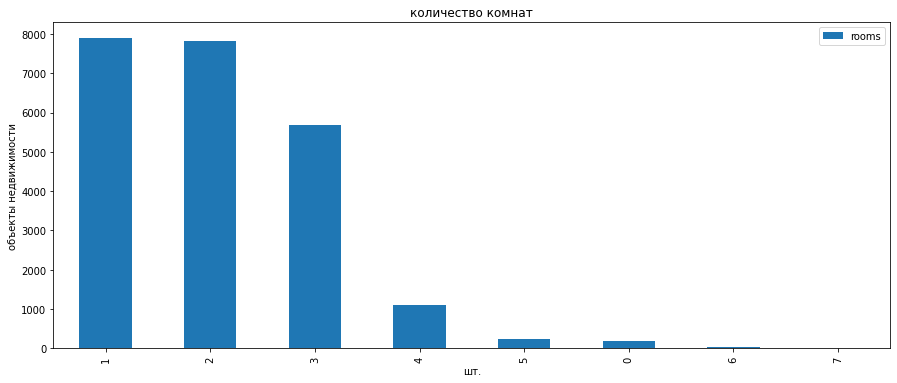

In [102]:
data['rooms'].value_counts().plot.bar(figsize=(15, 6), legend=True) 
# Отобразим гистограмму
plt.title('количество комнат')
plt.xlabel('шт.')
plt.ylabel('объекты недвижимости')
plt.show()

Вывод: среди представленных объектов недвижимости, наибольшее количество (7901 шт.) - это однокомнатные квартиры, несколько меньше (7809 шт.) - это двухкомнатные квартиры, далее по числу комнат идут трехкомнатные (5677 шт.) и четырехкомнатные (1003 шт.), максимальное число комнат у представленных объектов недвижимости - 7 комнат, при этом медиана и среднее значение имеют одинаковое значение и равны 2 комнатам.

#### Изучение параметров квартир. Высота потолков.

In [103]:
data['ceiling_height'].describe() 
# Вызовем describe () для отображения статистики

count    14082.000000
mean         2.717164
std          0.283031
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

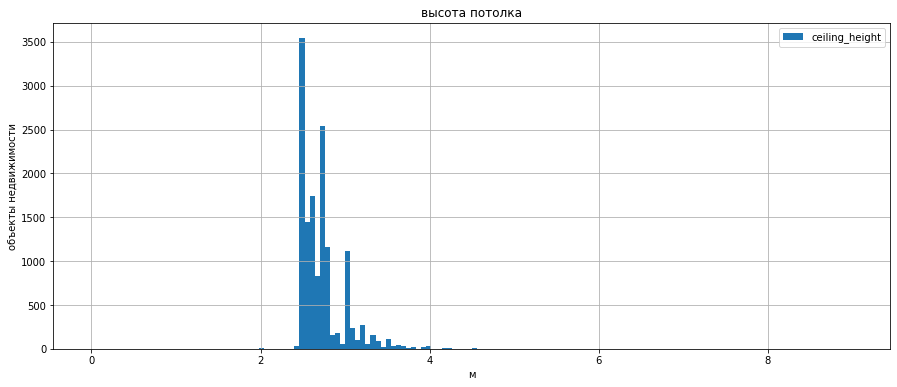

In [104]:
data['ceiling_height'].hist(bins = 150, figsize = (15,6), range = (0, 9), legend=True); 
plt.title('высота потолка')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()


Вывод: из представленных объектов недвижимости, наибольшее число имеют высоту полока 2.6 метра, при этом медиана равна 2.65 метрам, среднее значение высоты полока стоставляет 2.7 метра. 

#### Изучение параметров квартир. Тип этажа квартиры. 

In [105]:
data.groupby('floor_type')['floor_type'].count() 
# сгруппируем данные по типу этажей

floor_type
другой       16936
первый        2829
последний     3206
Name: floor_type, dtype: int64

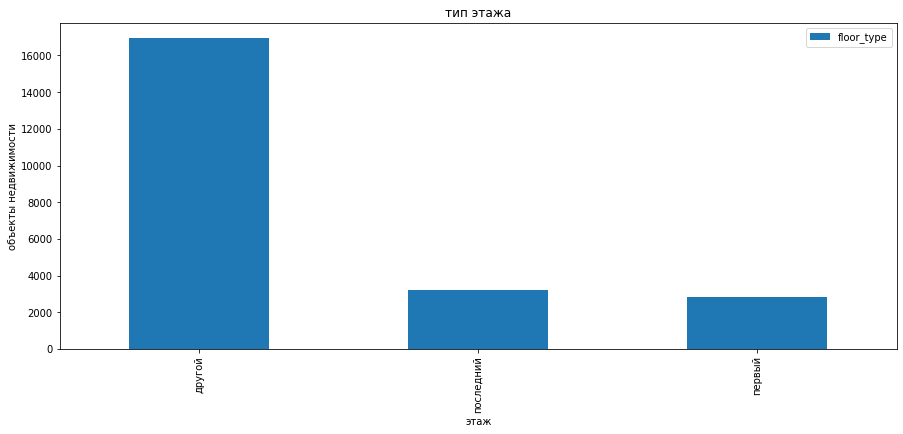

In [106]:
data['floor_type'].value_counts().plot.bar(figsize=(15, 6), legend=True) 
plt.title('тип этажа')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()
plt.show()
# Отобразим гистограмму

Вывод: из представленных объектов недвижимости, наибольшее число квартир находится между первым и последним этажом (16936 шт.), при этом объектов на первом этаже (2829 шт.) несколько меньше, чем на последнем (3206 шт.).

#### Изучение параметров квартир. Этаж квартиры.

In [107]:
data['floor'].describe() 
# Вызовем describe () для отображения статистики

count    22971.000000
mean         5.900222
std          4.884051
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

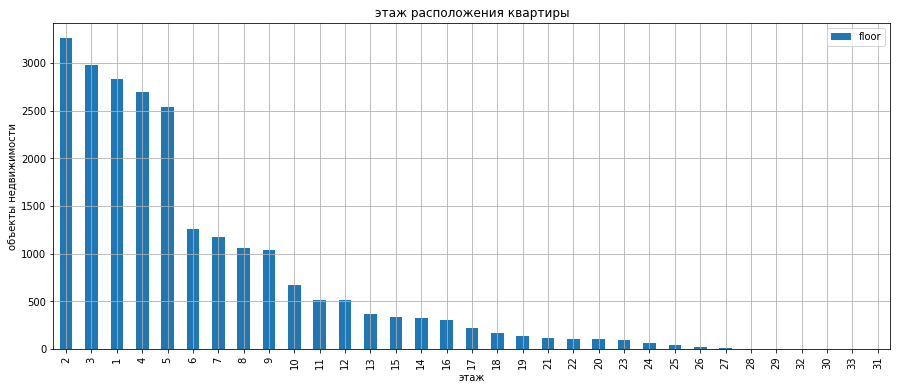

In [108]:
data['floor'].value_counts().plot.bar(figsize=(15, 6), legend=True, grid=True) 
plt.title('этаж расположения квартиры')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()
# Отобразим гистограмму

In [109]:
data['floor'].value_counts()

2     3258
3     2983
1     2829
4     2691
5     2536
6     1258
7     1177
8     1055
9     1037
10     675
11     513
12     511
13     369
15     334
14     330
16     309
17     220
18     170
19     142
21     117
22     109
20     107
23      97
24      61
25      43
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

Вывод: из представленных объектов недвижимости, наибольшее число (3258 шт.) продаются на 2-м этаже, далее (2983 шт.) продаются на третьем этаже, далее на первом этаже продаётся 2829 квартиры.

#### Изучение параметров квартир. Общее количество этажей в доме.

In [110]:
data['floors_total'].describe() 
# Вызовем describe () для отображения статистики

count    22971.000000
mean        10.740368
std          6.587139
min          2.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [111]:
data['floors_total'].value_counts() 

5     5628
9     3721
16    1359
12    1349
10    1159
4     1144
25    1065
17     823
6      820
3      642
7      548
14     545
18     498
24     459
2      371
15     363
8      347
23     340
19     330
22     282
20     266
13     223
11     199
27     161
21     156
26     123
35      24
28      21
36       2
34       1
33       1
29       1
Name: floors_total, dtype: int64

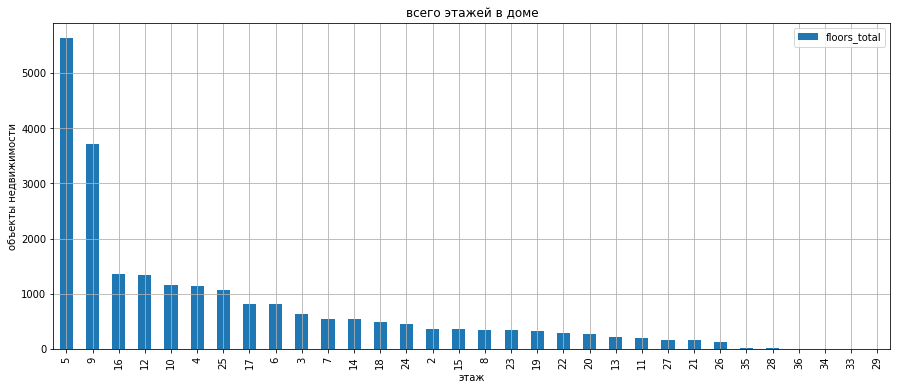

In [112]:
data['floors_total'].value_counts().plot.bar(figsize=(15, 6), legend=True, grid=True) 
plt.title('всего этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()
# Отобразим гистограмму

Вывод: из представленных объектов недвижимости, наибольшее число квартир продаётся в пятиэтажных домах (5628 объектов недвижимости) и 9 этажных домах (3721 объектов недвижимости). Также достаточно популярные квартиры находятся в 16 этажных и 12 этажных домах.

#### Изучение параметров квартир. Расстояние до центра города в метрах.

In [113]:
data['city_centers_nearest'].describe()# Вызовем describe () для отображения статистики

count    17539.000000
mean     14360.458008
std       8570.848220
min        181.000000
25%       9592.000000
50%      13218.000000
75%      16360.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

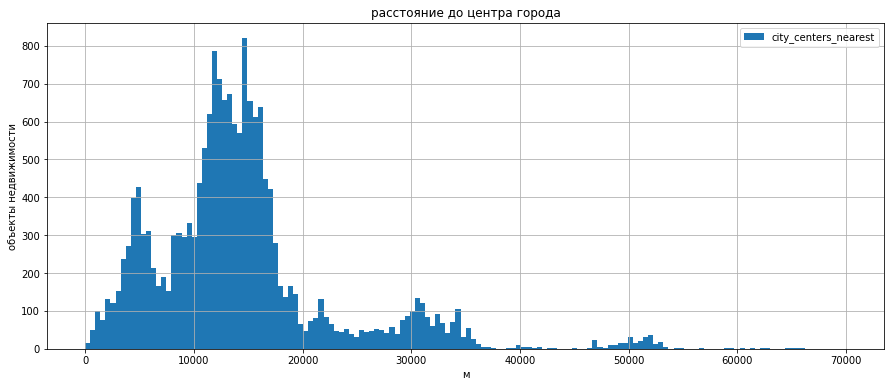

In [114]:
data['city_centers_nearest'].hist(bins = 150, figsize = (15,6), range = (0, 70000), legend=True); 
plt.title('расстояние до центра города')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()

Вывод: из представленных объектов недвижимости, наибольшее число находятся на расстоянии примерно 14 км от центра города Санк-Петербург, при этом медиана равна 13.2 километрам, среднее значение по расстоянию от центра города стоставляет 14.4 километра. 

#### Изучение параметров квартир. Расстояние до ближайшего аэропорта

In [115]:
data['airports_nearest'].describe() # Вызовем describe () для отображения статистики

count    17519.000000
mean     28841.297563
std      12716.346309
min          0.000000
25%      18446.000000
50%      26886.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

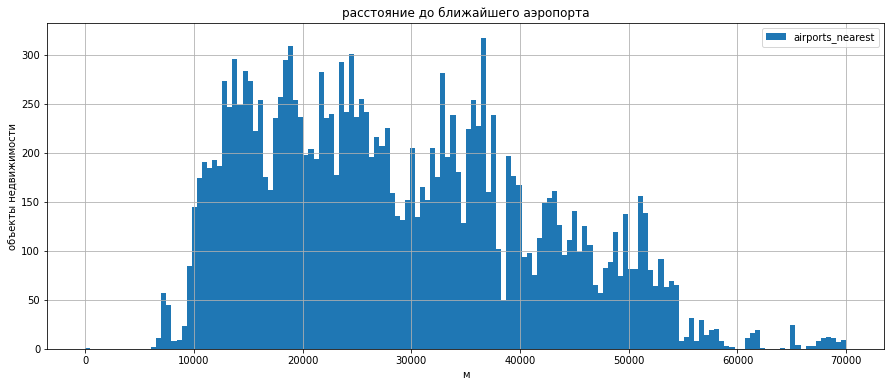

In [116]:
data['airports_nearest'].hist(bins = 150, figsize = (15,6), range = (0, 70000), legend=True); 
plt.title('расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()


Вывод: из объектов недвижимости, наибольшее число находятся на расстоянии примерно до 37 км от аэропорта города Санк-Петербург, при этом медиана равна 26.8 километрам, среднее значение по расстоянию от аэропорта города стоставляет 28.8 километра.

#### Изучение параметров квартир. Расстояние до ближайшего парка

In [117]:
data['parks_nearest'].describe() # Вызовем describe () для отображения статистики

count    7689.000000
mean      493.355833
std       341.473888
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

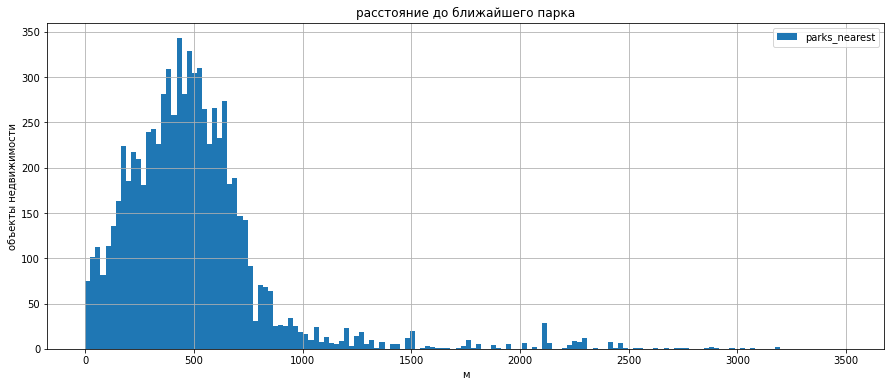

In [118]:
data['parks_nearest'].hist(bins = 150, figsize = (15,6), range = (0, 3500), legend=True); 
plt.title('расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()
#построим гисторамму методом hist()


Вывод: из представленных объектов недвижимости, наибольшее число находятся на расстоянии примерно 450 м от парка, при этом медиана равна 456 метрам, среднее значение по расстоянию от парка 493 метр.

#### Изучение параметров квартир. День и месяц публикации объявления.

In [119]:
data.groupby('dayweek_exposition')['dayweek_exposition'].count().sort_values(ascending=False)
# сгруппируем и выведем значения за дни

dayweek_exposition
3    4151
1    4058
4    3909
2    3836
0    3494
5    1880
6    1643
Name: dayweek_exposition, dtype: int64

In [120]:
data.groupby('month_exposition')['month_exposition'].count().sort_values(ascending=False) # сгруппируем и выведем значения за месяцы

month_exposition
2     2564
3     2511
11    2313
4     2301
10    2058
9     1931
6     1708
8     1700
7     1633
12    1578
1     1441
5     1233
Name: month_exposition, dtype: int64

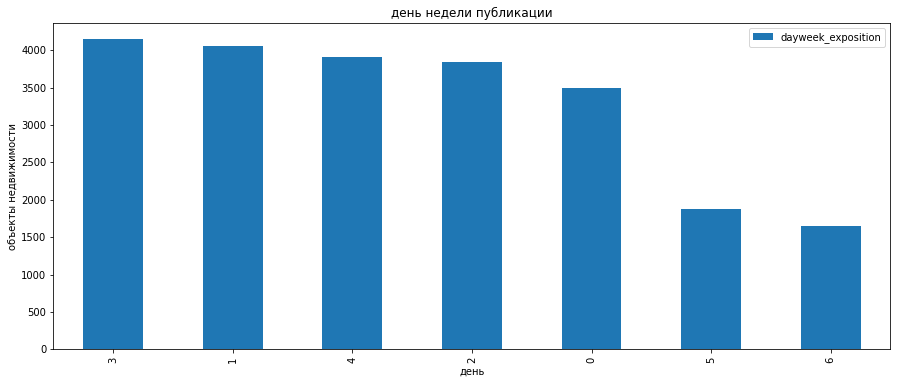

In [121]:
data['dayweek_exposition'].value_counts().plot.bar(figsize=(15, 6), legend=True) # Отобразим гистограмму
plt.title('день недели публикации')
plt.xlabel('день')
plt.ylabel('объекты недвижимости')
plt.show()


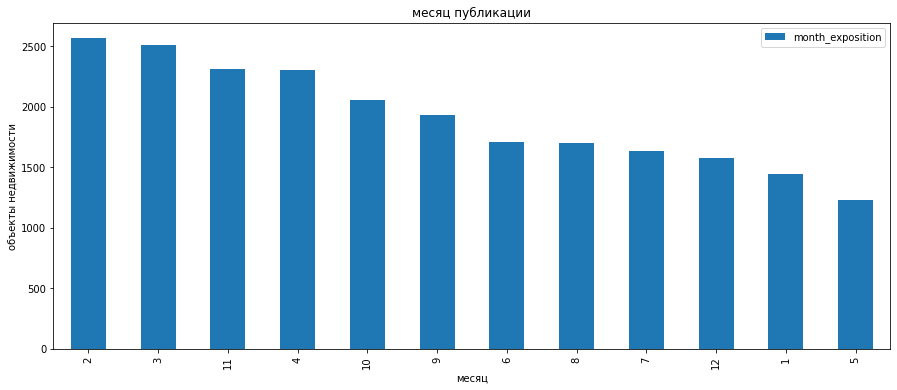

In [122]:
data['month_exposition'].value_counts().plot.bar(figsize=(15, 6), legend=True) # Отобразим гистограмму
plt.title('месяц публикации')
plt.xlabel('месяц')
plt.ylabel('объекты недвижимости')
plt.show()

Вывод: из представленных объектов недвижимости, наибольшее число публикаций объявлений приходится на четверг (порядка 4151 шт.) и вторник (4058 шт.), наименьшее в воскресенье (1643 шт.) и в субботу (1880 шт.). Если смотреть в разрезе месяцев года, то наибольшее число публикаций объявлений приходится на февраль (2564 шт.) и март (2511 шт.), наименьшее в май (1233 шт.) и январь (1441 шт.). Скорее всего высокие показатели числа публикаций в феврале связаны с отложенным спросом в виду январских длинных каникул.

### Исследуем как быстро продавались квартиры 

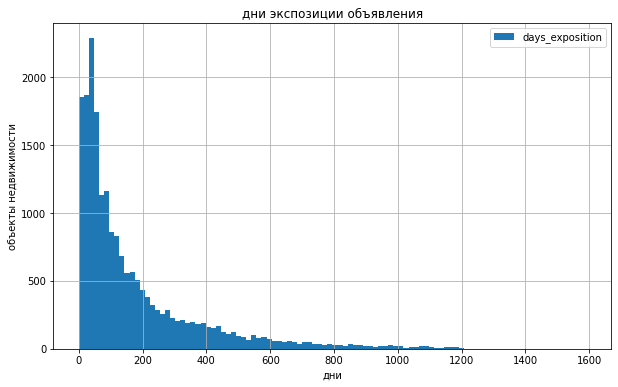

In [123]:
data['days_exposition'].hist(bins=100, range=(0, 1590),figsize=(10,6), legend=True) 
plt.title('дни экспозиции объявления')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()
# Отобразим гистограмму

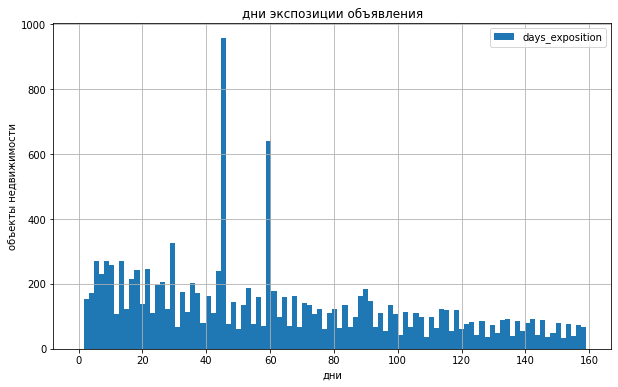

In [124]:
data['days_exposition'].hist(bins=100, range=(0, 159),figsize=(10,6), legend=True) 
plt.title('дни экспозиции объявления')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()
# Отобразим гистограмму без выбросов

Вывод: судя по графику объявления снимались с эспозиции в большом количестве на 45 и 60 день, при этом согласно Условиям размещения объявлений, у сервиса Яндекс.Недвижимость стоит режим перехода объявления в архив (при стоимости квартиры до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней) в эти даты и заканчивается подписка, которая влияет на показатели исследования.  

#### Получим данные по статистике 

In [125]:
data['days_exposition'].describe() # Вызовем describe

count    19898.000000
mean       174.397025
std        205.151767
min          3.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1199.000000
Name: days_exposition, dtype: float64

Вывод: из представленных в сервисе Яндекс.Недвидимость объявлений, максимальное число дней экспонирования составляет 1199 дней, минимальное значение 3 дня, медиана 94 дня, среднее значение 174 дней. Стандартное отклонение 205 дней.  Среднее значение сильно выше (почти в 2 раза) медианного - необходимо отбросить выбросы.

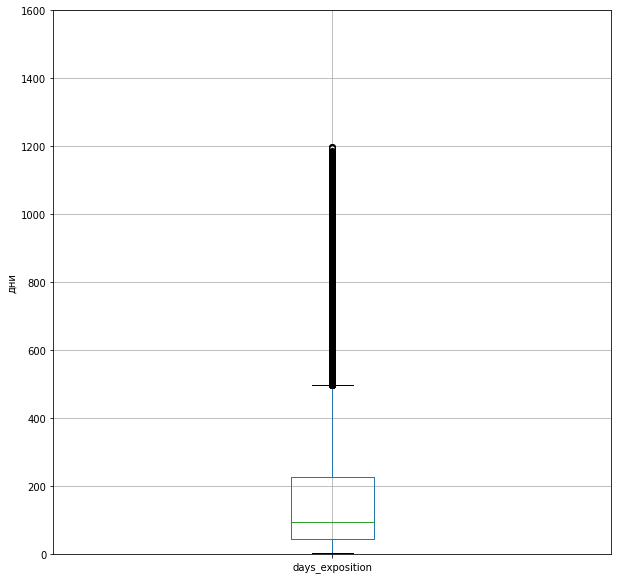

In [126]:
data.boxplot(column='days_exposition', figsize=(10, 10)) #построим гистограмму boxplot
plt.ylim(0, 1600)
plt.ylabel('дни')
plt.show()

Судя по графику макимальное значение равно примерно 500 дням, после которого идут выбросы, сделаем срез, убрав выбросы, построим гистограмму boxplot в новом масштабе: 

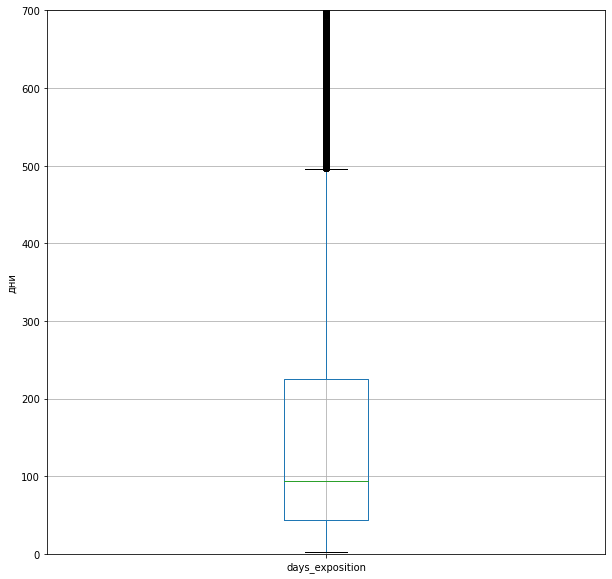

In [127]:
data.boxplot(column='days_exposition', figsize=(10, 10)) #построим гистограмму boxplot
plt.ylim(0, 700)
plt.ylabel('дни')
plt.show()

Основные выводы:
Среднее время в течении которого продаётся квартира составляет от 46 до 225 дней;
быстрые продажи - от 3 до 45 дней;
медленные от 226 до примерно 490 дней.

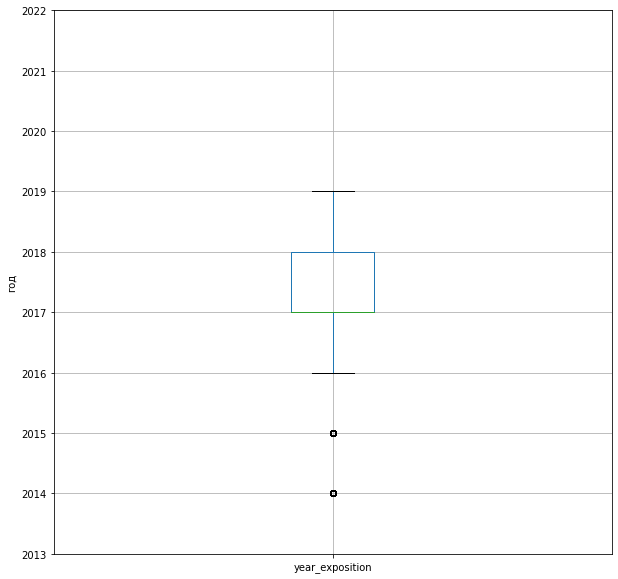

In [128]:
data.boxplot(column='year_exposition', figsize=(10, 10)) #построим гистограмму boxplot
plt.ylim(2013, 2022)
plt.ylabel('год')
plt.show()

Вывод: наиболее быстро объекты недвижимости продавались 2016-2017 годах, средне 2017-2018 и долго 2018-2019 гг.

### Определение факторов, котрые больше всего влияют на общую (полную) стоимость объекта 
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

#### Определим влияние на стоимость роста квартиры от:
  - общей площади;
  - жилой площади;
  - площади кухни.

Построим графики зависимости стоимости от площадей - общей площади, жилой площади, площади кухни:

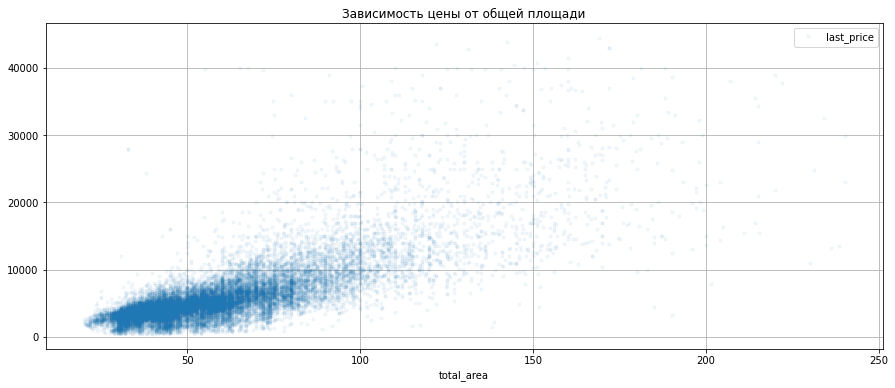

In [129]:
data.plot(x='total_area', y='last_price', style='.', title='Зависимость цены от общей площади',figsize=(15, 6), alpha=0.05, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции  цены от общей площади для отображения линейной зависимости:

In [130]:
print('Коэффициент корреляции цены от общей площади:', round(data['total_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от общей площади: 0.77


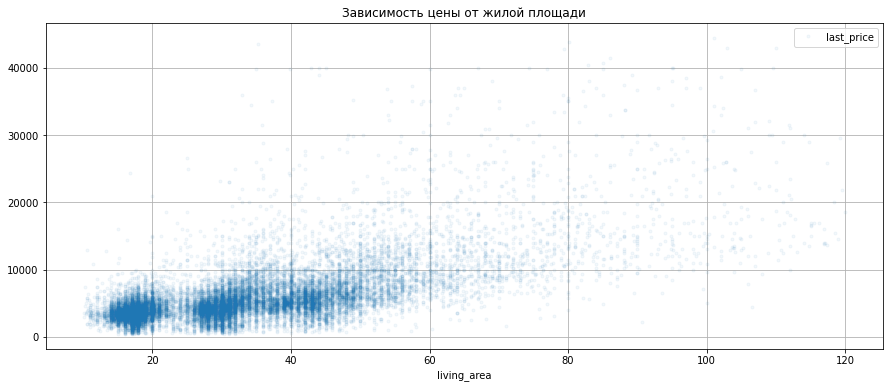

In [131]:
data.plot(x='living_area', y='last_price', style='.', title='Зависимость цены от жилой площади',figsize=(15, 6), alpha=0.05, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции цены от жилой площади для отображения линейной зависимости:

In [132]:
print('Коэффициент корреляции цены от жилой площади:', round(data['living_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от жилой площади: 0.66


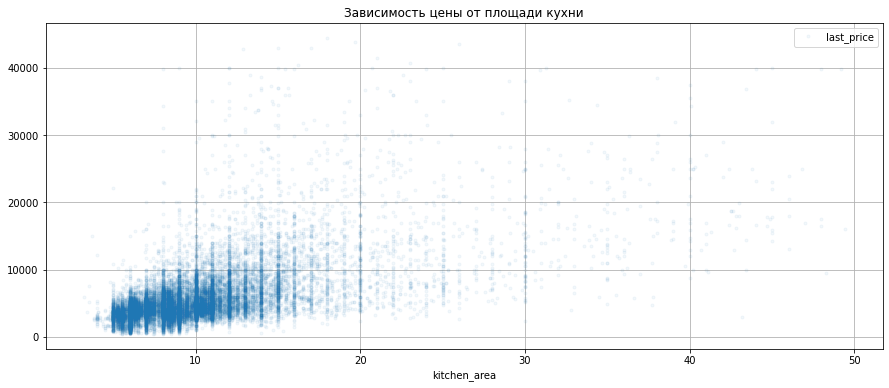

In [133]:
data.plot(x='kitchen_area', y='last_price', style='.', title='Зависимость цены от площади кухни',figsize=(15, 6), alpha=0.05, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции цены от площади кухни для отображения линейной зависимости:

In [134]:
print('Коэффициент корреляции цены от площади кухни:', round(data['kitchen_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от площади кухни: 0.59


Выводы:
В соответсвии с построенными графиками, cтоимость квартиры в целом растет с ростом общей площади, жилой площадии и площади кухни, при этом большую линейную зависимость (больший коэффициент корреляции Пирсона) роста цены квартиры от роста площади имеет общая площадь (0.78), далее следует жилая комната (0.66) и на последнем месте площадь кухни, которая наиболее слабо влияет на общий рост стоимости квартиры (коэффициент 0.59).

#### Определим влияние на стоимость роста квартиры от количества комнат:

Коэффициент корреляции цены от количества комнат 0.47


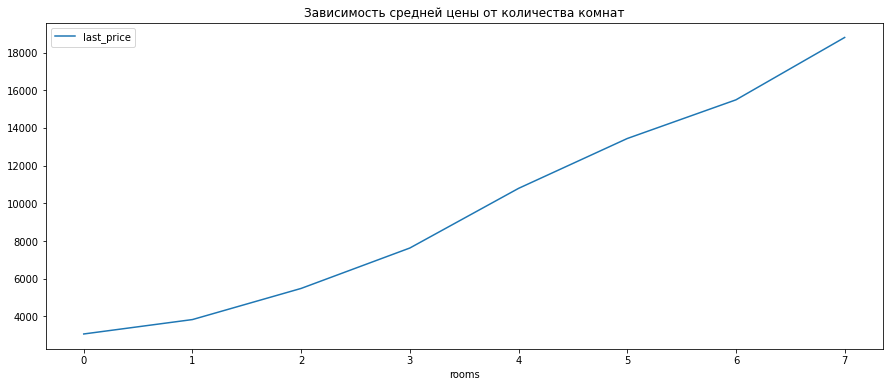

In [135]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='-',title='Зависимость средней цены от количества комнат', figsize=(15,6))
plt.show
print('Коэффициент корреляции цены от количества комнат', round(data['rooms'].corr(data['last_price']), 2))

Вывод: рост количества комнат линейно влияет на рост стоимости квартиры, с ростом количества комнат растет стоимость квартиры, коэффицент корреляции равен 0.48.

#### Определим влияние на стоимость роста квартиры от типа этажа, на котором расположена квартира (первый, последний, другой).

Сделаем сводную таблицу по стоимости и типу этажа и построим график зависимости стоимости от типа этажа:


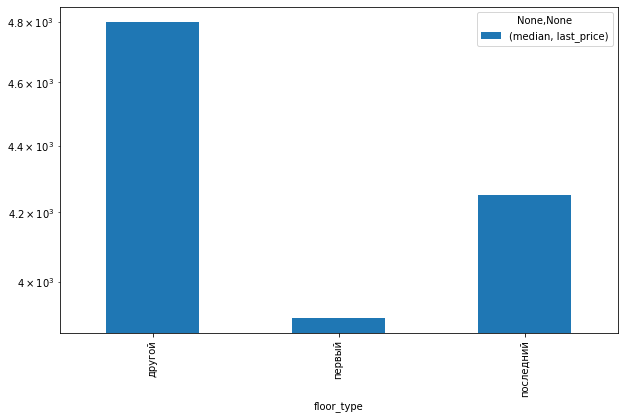

In [136]:
data_total_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc=['median']) 
data_total_floor_type.plot(style='-', figsize=(10,6), kind='bar', logy=True) 
plt.show()

Вывод:
Судя по полученным данным, нахождение квартиры на первом этаже сильно снижает её стоимость, а на нахождение на последнем этаже снижает её значительно. Стоимость квартир на первом и последних этажах ниже, чем на других этажах.


#### Определим влияние на стоимость роста квартиры от даты размещения (день недели)

Коэффициент корреляции цены от дня недели экспозиции -0.01


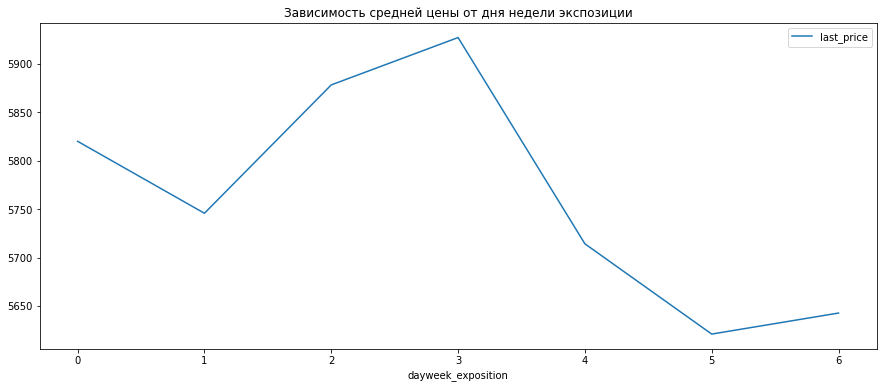

In [137]:
data.pivot_table(index='dayweek_exposition', values='last_price', aggfunc='mean').plot(style='-',title='Зависимость средней цены от дня недели экспозиции', figsize=(15,6))
plt.show
print('Коэффициент корреляции цены от дня недели экспозиции', round(data['dayweek_exposition'].corr(data['last_price']), 2))

Вывод: день недели размещения объявления не имеет линейного влияния на рост стоимости квартиры, коэффицент корреляции равен -0.01. При этом квартиры, объявления которых были размещены во вторник и субботу продавались по стоимости ниже, чем в понедельник и четверг.


#### Определим влияние стоимости роста от даты размещения (месяц):

Коэффициент корреляции цены от месяца экспозиции 0.0


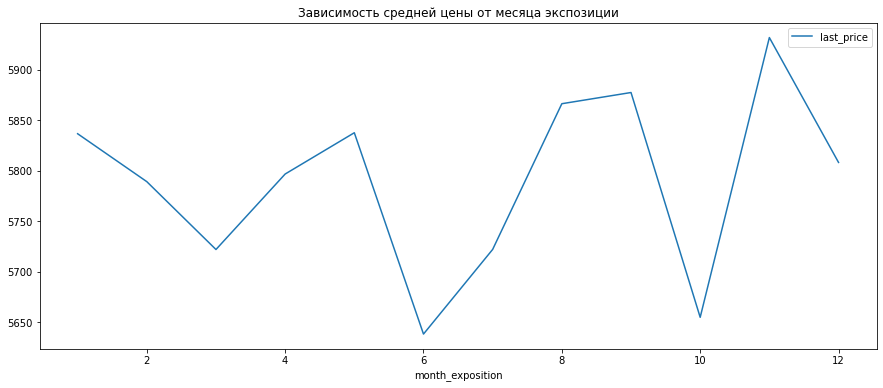

In [138]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(style='-',title='Зависимость средней цены от месяца экспозиции', figsize=(15,6))
plt.show
print('Коэффициент корреляции цены от месяца экспозиции', round(data['month_exposition'].corr(data['last_price']), 2))

Вывод:
месяц размещения объявления не имеет линейного влияния на рост стоимости квартиры, коэффицент корреляции равен 0. При этом квартиры, объявления которых были размещены во апреле, июне и октябре продавались по стоимости ниже, чем мае, сентябре и декабре.

#### Определим влияние стоимости роста от даты размещения (год)

Коэффициент корреляции цены от года экспозиции -0.03


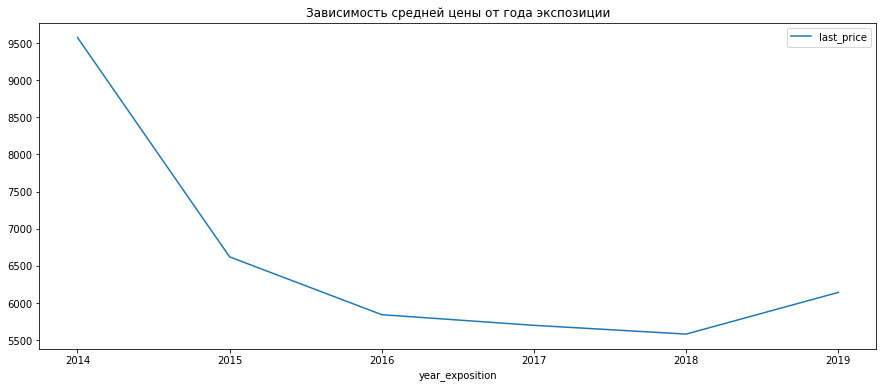

In [139]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(style='-',title='Зависимость средней цены от года экспозиции', figsize=(15,6))
plt.show
print('Коэффициент корреляции цены от года экспозиции', round(data['year_exposition'].corr(data['last_price']), 2))

Вывод:
год размещения объявления имеет слабо отрицателное влияния на рост стоимости квартиры, коэффицент корреляции равен -0.04. При этом квартиры, объявления которых были размещены в 2014 году, продавались по стоимости выше, чем в последующих годах, данная инфомрмация требует уточнения.

Изучим как изменялась площадь продаваемх квартир с годами:

<function matplotlib.pyplot.show(close=None, block=None)>

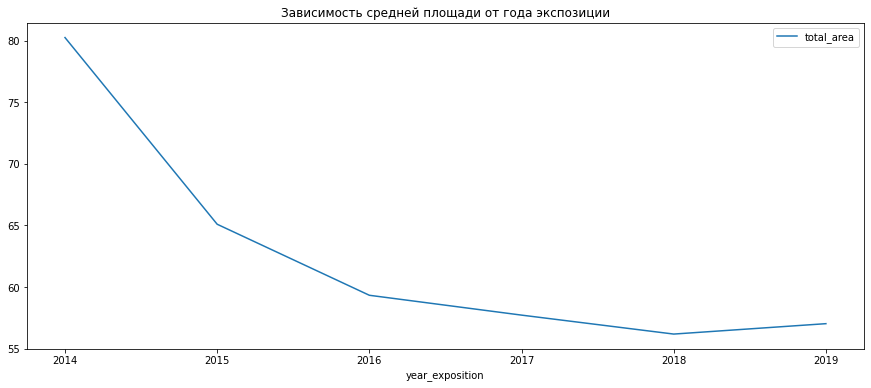

In [140]:
data.pivot_table(index='year_exposition', values='total_area', aggfunc='mean').plot(style='-',title='Зависимость средней площади от года экспозиции', figsize=(15,6))
plt.show


Вывод: площадь продаваемых квартир неуклонно снижалась с 2014 года, что может говорить о росте публикации квартир студий или других квартир с маленькой площадью и более меньшей общей стоимостью.

Изучим как изменялось количество подаваемых объявлений по годам:

<function matplotlib.pyplot.show(close=None, block=None)>

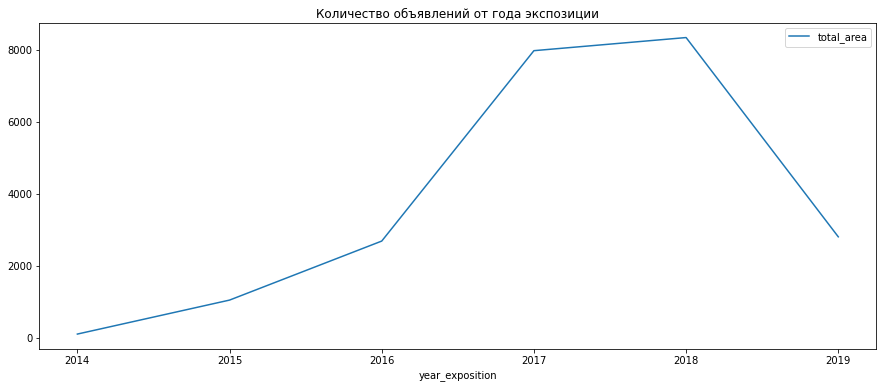

In [141]:
data.pivot_table(index='year_exposition', values='total_area', aggfunc='count').plot(style='-',title='Количество объявлений от года экспозиции', figsize=(15,6))
plt.show

Общий вывод по влиянию стоимости роста от года размещения:
При постоянном увеличении стоимости квартир на рынке г.Санкт-Петербурга, анализ показал отрицательную динамику стоимости роста с 2014 года.
При дополнительном исследовании оказалось что с 2014 года растёт как общее количество объявлений, так и количество продаваемых квартир с маленькой площадью, которые оказывют влияние на среднюю цену продаваемой квартиры, показываю отрицательную динамику.


### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [142]:
mean_price_top10 = data.pivot_table(index='locality_name', values='price_for_1m2', aggfunc=['count','mean'])
mean_price_top10 = mean_price_top10.sort_values(('count', 'price_for_1m2'), ascending=False).head(10).sort_values(('mean', 'price_for_1m2'), ascending=False).astype('int')
mean_price_top10

,count,mean
,price_for_1m2,price_for_1m2
locality_name,,
Санкт-Петербург,15155,111630
Пушкин,358,102836
Кудрово,467,95268
поселок Парголово,326,90103
поселок Мурино,542,85365
поселок Шушары,437,78554
Колпино,337,75333
Гатчина,306,68757


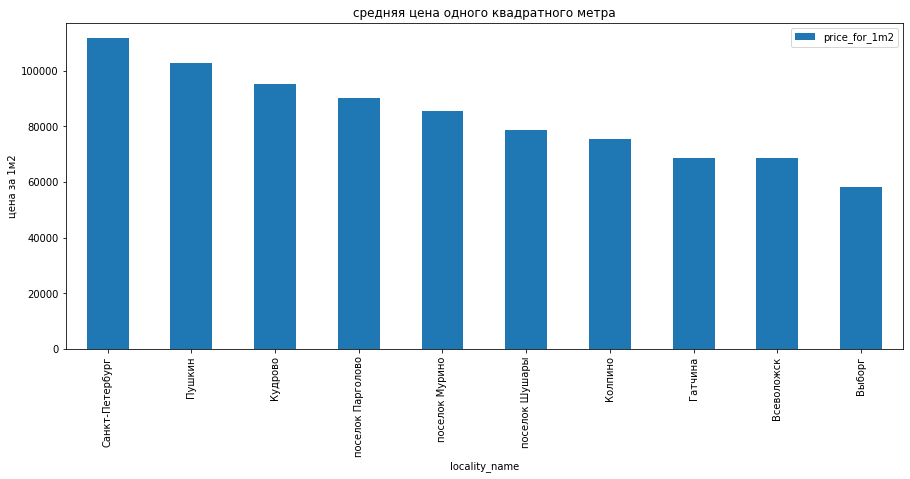

In [143]:
mean_price_top10.plot.bar(y='mean', figsize=(15, 6), legend=True) 
plt.title('средняя цена одного квадратного метра')
plt.ylabel('цена за 1м2')
plt.show()
# Отобразим гистограмму

Вывод: 
наиболее дорогими локациями по цене на 1 квадратный метр явлюются г.Санкт-Петербург, г.Пушкин и Кудрово, наименее дорогими Выборг, Гатчина и Всеволжск.

###  Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [144]:
flat_spb_mean = data[data['locality_name'] =='Санкт-Петербург']         
flat_spb_mean 
#сделаем срез по г.'Санкт-Петербург'.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,dayweek_exposition,month_exposition,year_exposition,floor_type,"distance_to_citycenter,km"
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
2,10,5196.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
7,5,7915.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,NaN,0.0,NaN,NaN,110545.0,3,4,2019,другой,12.0
9,18,5400.0,61.00,2017-02-26,3,2.50,9,43.6,7,True,...,NaN,0.0,NaN,289.0,88525.0,6,2,2017,другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550.0,35.30,2018-02-28,1,2.86,15,16.3,4,True,...,353.0,2.0,652.0,29.0,100567.0,2,2,2018,другой,16.0
23690,3,5500.0,52.00,2018-07-19,2,NaN,5,31.0,2,True,...,300.0,0.0,NaN,15.0,105769.0,3,7,2018,другой,6.0
23691,11,9470.0,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,NaN,1.0,806.0,519.0,129904.0,3,10,2016,другой,4.0
23694,9,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72491.0,1,3,2017,другой,4.0


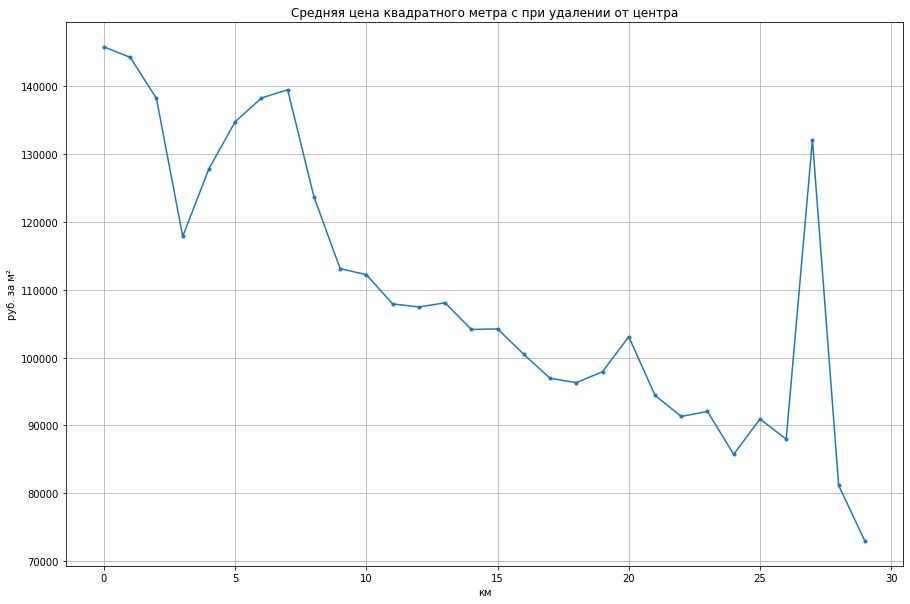

In [145]:
flat_spb_mean = flat_spb_mean.pivot_table(index='distance_to_citycenter,km', values='price_for_1m2')
flat_spb_mean.plot(marker='.', grid=True, figsize=(15, 10), legend=False)
plt.title('Средняя цена квадратного метра c при удалении от центра')
plt.xlabel('км')
plt.ylabel('руб. за м²')
plt.show()
#Построим график распределения стоимости квадратного метра в зависимости от удаления от центра

Вывод:
С удалением с каждым километром от центра г.Санкт-Петербург стоимость квартир снижается, особенно резко идёт снижение стоимости при удалении на 3 и 7 км от центра города. Есть пик роста стоимости при удалении на 27 километров от центра города, пройдя через который цена продолжает снижатся,проанализируем полученные пики.

Выполним группировку данных по типу этажа на квартирах г.Санкт-Петербург и подсчитаем их кол-во

In [146]:
data_grouped_SPB = data[data['locality_name'] =='Санкт-Петербург'] 
data_grouped_SPB = data_grouped_SPB[data_grouped_SPB['distance_to_citycenter,km'] < 8] 
data_grouped_SPB = data_grouped_SPB[data_grouped_SPB['distance_to_citycenter,km'] >= 2] 
data_grouped_SPB = data_grouped_SPB.groupby(['distance_to_citycenter,km','floor_type']).agg({'floor_type':'count'})
data_grouped_SPB
#выполним группировку методом groupby().

floor_type
distance_to_citycenter,km floor_type            
2.0                       другой             155
                          первый              43
                          последний           68
3.0                       другой             194
                          первый              53
                          последний           73
4.0                       другой             463
                          первый              77
                          последний          105
5.0                       другой             626
                          первый              76
                          последний          128
6.0                       другой             410
                          первый              63
                          последний           76
7.0                       другой             297
                          первый              29
                          последний           55

После группировки данных видим что результатом пика является появление большого пула более дорогих квартир (категория "другой') на отрезке 3-7 км.

Проанализируем также пики, посмотрев на количество квартир разных категорий (первый, последний, другой) построив графики:

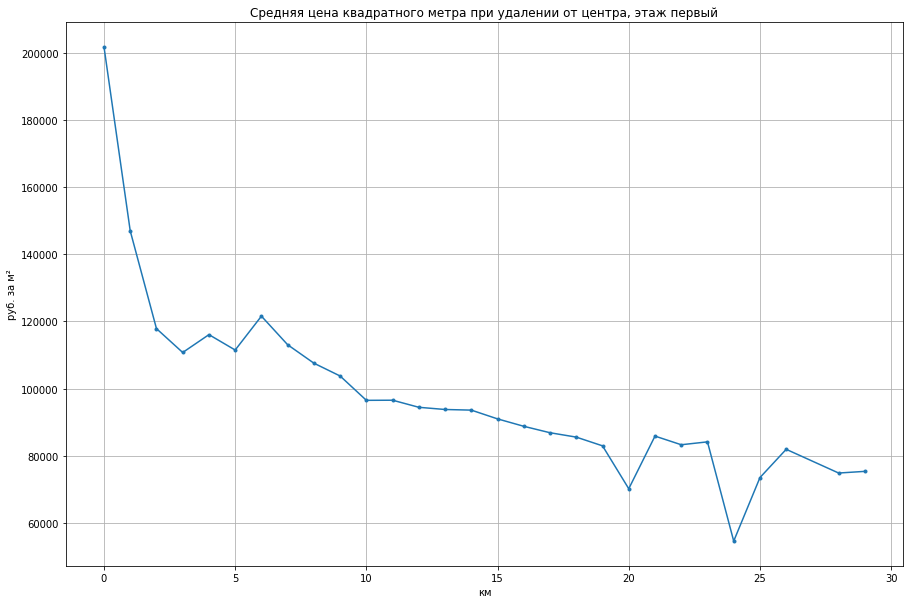

In [147]:
flat_spb_mean_1 = data[data['locality_name'] =='Санкт-Петербург']
flat_spb_mean_1 = flat_spb_mean_1[flat_spb_mean_1['floor_type'] =='первый']   
flat_spb_mean_1 = flat_spb_mean_1.pivot_table(index='distance_to_citycenter,km', values='price_for_1m2')
flat_spb_mean_1.plot(marker='.', grid=True, figsize=(15, 10), legend=False)
plt.title('Средняя цена квадратного метра при удалении от центра, этаж первый')
plt.xlabel('км')
plt.ylabel('руб. за м²')
plt.show()
#Построим график распределения стоимости квадратного метра в зависимости от удаления от центра для квартир на первом этаже

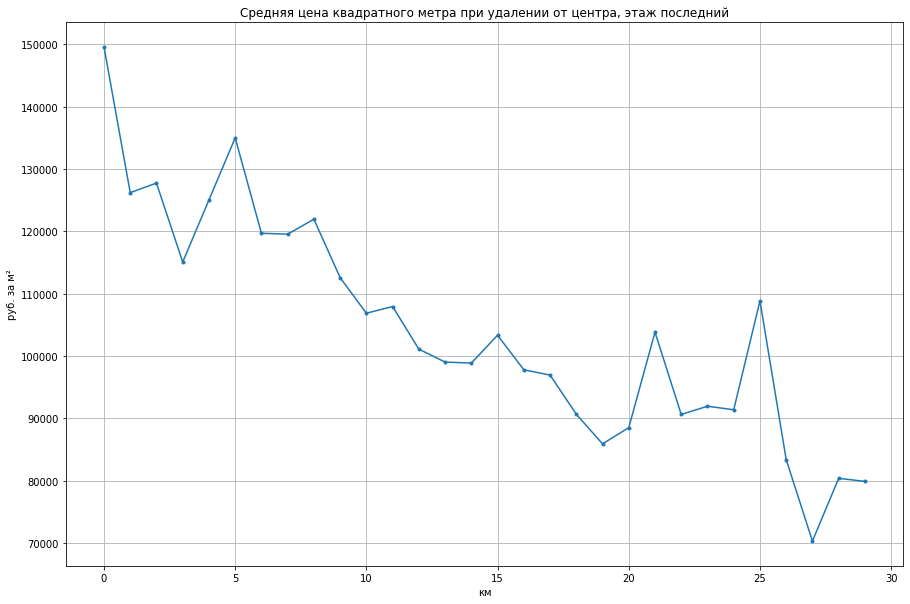

In [148]:
flat_spb_mean_last = data[data['locality_name'] =='Санкт-Петербург']
flat_spb_mean_last = flat_spb_mean_last[flat_spb_mean_last['floor_type'] =='последний']             
flat_spb_mean_last = flat_spb_mean_last.pivot_table(index='distance_to_citycenter,km', values='price_for_1m2')
flat_spb_mean_last.plot(marker='.', grid=True, figsize=(15, 10), legend=False)
plt.title('Средняя цена квадратного метра при удалении от центра, этаж последний')
plt.xlabel('км')
plt.ylabel('руб. за м²')
plt.show()
#Построим график распределения стоимости квадратного метра в зависимости от удаления от центра для квартир на последенем этаже

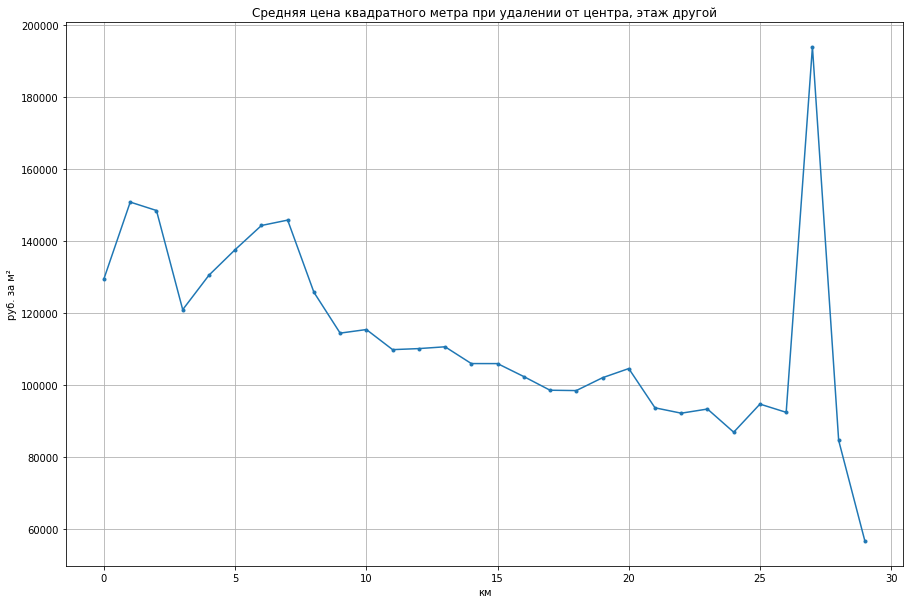

In [149]:
flat_spb_mean_other = data[data['locality_name'] =='Санкт-Петербург']
flat_spb_mean_other = flat_spb_mean_other[flat_spb_mean_other['floor_type'] =='другой']             
flat_spb_mean_other = flat_spb_mean_other.pivot_table(index='distance_to_citycenter,km', values='price_for_1m2')
flat_spb_mean_other.plot(marker='.', grid=True, figsize=(15, 10), legend=False)
plt.title('Средняя цена квадратного метра при удалении от центра, этаж другой')
plt.xlabel('км')
plt.ylabel('руб. за м²')
plt.show()
#Построим график распределения стоимости квадратного метра в зависимости от удаления от центра для квартир на другом этаже

Пик более дорогих квартир категории 'другой' практически полностью повторил общую тенденцию на отрезке 3-7 км, что говорит о корректном наблюдении, что на данный пик повлияло появление большого количества квартир данной категории ('другой') на данном отрезке (3-7 км).

Рассмотрим анамалию на 27 км подробнее:

In [150]:
data_grouped_SPB_27km = data[data['locality_name'] =='Санкт-Петербург'] 
data_grouped_SPB_27km = data_grouped_SPB_27km[data_grouped_SPB_27km['distance_to_citycenter,km'] >= 26] 
data_grouped_SPB_27km
#выполним срез

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,dayweek_exposition,month_exposition,year_exposition,floor_type,"distance_to_citycenter,km"
253,17,3340.00,37.00,2018-03-28,1,NaN,5,19.00,4,True,...,251.0,1.0,350.0,75.0,90270.0,2,3,2018,другой,26.0
539,13,3250.00,40.00,2018-06-25,1,NaN,10,NaN,1,True,...,159.0,1.0,1250.0,45.0,81250.0,0,6,2018,первый,26.0
748,13,14350.00,74.00,2017-11-28,2,3.13,5,30.00,3,True,...,1496.0,0.0,NaN,128.0,193919.0,1,11,2017,другой,27.0
814,0,7600.00,111.00,2017-07-26,3,3.00,16,63.00,12,True,...,185.0,2.0,72.0,66.0,68468.0,2,7,2017,другой,28.0
1111,0,4072.00,38.00,2015-10-14,1,NaN,5,16.00,4,True,...,NaN,0.0,NaN,285.0,107158.0,2,10,2015,другой,28.0
1239,7,3355.00,37.77,2017-12-21,1,2.60,12,14.56,5,True,...,159.0,1.0,1250.0,147.0,88827.0,3,12,2017,другой,26.0
3342,6,3090.00,33.30,2017-01-17,1,NaN,5,12.00,4,True,...,126.0,1.0,979.0,489.0,92793.0,1,1,2017,другой,26.0
3780,10,3392.33,34.51,2018-10-01,1,NaN,5,15.00,4,True,...,400.0,1.0,492.0,145.0,98300.0,0,10,2018,другой,26.0
3986,5,2950.00,36.30,2016-12-28,1,NaN,5,15.25,1,True,...,126.0,1.0,979.0,159.0,81267.0,2,12,2016,первый,26.0
5238,13,3150.00,50.00,2018-09-04,2,2.65,3,28.00,3,True,...,NaN,0.0,NaN,30.0,63000.0,1,9,2018,последний,26.0


Вывод: на пик роста стоимости на 27 км повлияло объявление о продаже квартиры с ID748, стоимость квадратного метра у которой составила 193 919 руб., что более чем в 2 раза больше чем у квартиры на аналогичном расстоянии от центра.

### Общий вывод

#### Выводы по предобработке данных:


  1. Получены исходные данные для исследования, постороены гистограммы;
  2. Определены и заполнены пропущенные значения в столбцах 'is_apartment' и 'balcony';
  3. Изменены типы данных в столбцах 'last_price' и 'balcony' на (int), 'first_day_exposition' на (datetime), 'is_apartment' на (bool), приведены пояснения;
  4. Явных дубликатов не выявлено, устранены неявные дубликаты в названиях населённых пунктов;
  5. Выявлены и устранены редкие и выбивающиеся значения (аномалии) в столбце 'ceiling_height'.

#### Выводы по исследовательскому анализу данных

Согласно заданию было проведенно аналитичесское исследование по архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Ниже приведены основные выводы данного исследования.

  1. Общая площадь квартир: на рынке недвижимости Санкт-Петербурга и соседних населённых пунктах в сервисе Яндекс.Недвижимость представлены квартиры общей площадью от 20 до 240 квадратных метров в количестве 22971 шт., наибольшее число квартир имеет общую площадь порядка 47 квадратных метров, при этом медиана равна 52 квадратным метрам, среднее значение общей площади стоставляет 58 квадратных метра;
  2. Жилая площадь квартир: из представленных объектов недвижимости, жилую площадь имеют 21159 квартир, которая составляет от 10 до 119 квадратных метров, наибольшее число из представленных квартир имеют жилую площадь около 18 квадратных метров, при этом медиана равна 30 квадратным метрам, среднее значение жилой площади стоставляет 33 квадратных метра;
  3. Площадь кухни:  из представленных объектов недвижимости, наибольшее число квартир имеют площадь кухонной зоны 10 квадратных метров, при этом медиана равна 9.0 квадратным метрам, среднее значение 10.2 квадратных метров;
  4. Цена объекта: из представленных объектов недвижимости, наибольшее число квартир продаётся по стоимости от 3.5 до 5 млн.руб, при этом медиана равна 4.6 млн. руб, среднее значение стоимости 5.7 млн.руб. На среднее значение сильно влияют дорогие квартиры представленные в Яндекс.Недвижимости;
  5. Количество комнат: среди представленных объектов недвижимости, наибольшее количество (7901 шт.) - это однокомнатные квартиры, несколько меньше (7809 шт.) - это двухкомнатные квартиры, далее по числу комнат идут трехкомнатные (5677 шт.) и четырехкомнатные (1003 шт.), максимальное число комнат у представленных объектов недвижимости - 7 комнат, при этом медиана и среднее значение имеют одинаковое значение и равны 2 комнатам;
  6. Высота потолка: из представленных объектов недвижимости, наибольшее число (3258 шт.) продаются на 2-м этаже, далее (2983 шт.) продаются на третьем этаже, далее на первом этаже продаётся 2829 квартиры;
  7. Этажность: наибольшее число (2908 шт.) продаются на 2-м этаже, далее (2711 шт.) продаются на третьем этаже, далее на первом этаже продаётся 2518 квартиры;
  8. Этажность дома: из представленных объектов недвижимости, наибольшее число квартир продаётся в пятиэтажных домах (5628 объектов недвижимости) и 9 этажных домах (3721 объектов недвижимости). Также достаточно популярные квартиры находятся в 16 этажных и 12 этажных домах;
  9. Расстояние до центра города:  из представленных объектов недвижимости, наибольшее число находятся на расстоянии примерно 14 км от центра города Санк-Петербург, при этом медиана равна 13.2 километрам, среднее значение по расстоянию от центра города стоставляет 14.4 километра;
  10. Расстояние до ближайшего аэропорта:  из объектов недвижимости, наибольшее число находятся на расстоянии примерно до 37 км от аэропорта города Санк-Петербург, при этом медиана равна 26.8 километрам, среднее значение по расстоянию от аэропорта города стоставляет 28.8 километра;
  11. Расстояние до ближайшего парка: из представленных объектов недвижимости, наибольшее число находятся на расстоянии примерно 450 м от парка, при этом медиана равна 456 метрам, среднее значение по расстоянию от парка 493 метр;
  12. День недели и месяц публикации:из представленных объектов недвижимости, наибольшее число публикаций объявлений приходится на четверг (порядка 4151 шт.) и вторник (4058 шт.), наименьшее в воскресенье (1643 шт.) и в субботу (1880 шт.). Если смотреть в разрезе месяцев года, то наибольшее число публикаций объявлений приходится на февраль (2564 шт.) и март (2511 шт.), наименьшее в май (1233 шт.) и январь (1441 шт.). Скорее всего высокие показатели числа публикаций в феврале связаны с отложенным спросом в виду январских длинных каникул;
  13. Время продажи квартиры: объявления снимались с эспозиции в большом количестве на 45 и 60 день, при этом согласно Условиям размещения объявлений, у сервиса Яндекс.Недвижимость стоит режим перехода объявления в архив (при стоимости квартиры до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней) в эти даты и заканчивается подписка, которая влияет на показатели исследования
  14. Среднее время в течении которого продаётся квартира составляет от 46 до 225 дней, быстрые продажи - от 3 до 45 дней, медленные от 226 до примерно 490 дней;
  15. Наиболее быстро объекты недвижимости продавались 2016-2017 годах, средне 2017-2018 и долго 2018-2019 гг;
  16. Стоимость в зависимости от роста площади: cтоимость квартиры в целом растет с ростом общей площади, жилой площадии и площади кухни, при этом большую линейную зависимость (больший коэффициент корреляции Пирсона) роста цены квартиры от роста площади имеет общая площадь (0.77), далее следует жилая комната (0.66) и на последнем месте площадь кухни, которая наиболее слабо влияет на общий рост стоимости квартиры (коэффициент 0.59).;
  17. Стоимость в зависимости от количества комнат: рост количества комнат линейно влияет на рост стоимости квартиры, с ростом количества комнат растет стоимость квартиры, коэффицент корреляции равен 0.47;
  18. Стоимость в зависимости от этажа:судя по полученным данным, нахождение квартиры на первом этаже сильно снижает её стоимость, а на нахождение на последнем этаже снижает её значительно. Стоимость квартир на первом и последних этажах ниже, чем на других этажах;
  19. День недели размещения объявления не имеет линейного влияния на рост стоимости квартиры, коэффицент корреляции равен -0.01. При этом квартиры, объявления которых были размещены во вторник и субботу продавались по стоимости ниже, чем в понедельник и четверг;
  20. Месяц размещения объявления не имеет линейного влияния на рост стоимости квартиры, коэффицент корреляции равен 0. При этом квартиры, объявления которых были размещены во апреле, июне и октябре продавались по стоимости ниже, чем мае, сентябре и декабре.
  21. Год размещения объявления имеет слабо отрицателное влияния на рост стоимости квартиры, коэффицент корреляции равен -0.04. При этом квартиры, объявления которых были размещены в 2014 году, продавались по стоимости выше, чем в последующих годах, данная инфомрмация требует уточнения.
  22. При постоянном увеличении стоимости квартир на рынке г.Санкт-Петербурга, анализ показал отрицательную динамику стоимости роста с 2014 года.При дополнительном исследовании оказалось что с 2014 года растёт как общее количество объявлений, так и количество продаваемых квартир с маленькой площадью, которые оказывют влияние на среднюю цену продаваемой квартиры, показываю отрицательную динамику;
  23. Стоимость объекта в зависимости от расположения: наиболее дорогими локациями по цене на 1 квадратный метр явлюются г.Санкт-Петербург, г.Пушкин и Кудрово, наименее дорогими Выборг, Гатчина и Всеволжск.;
  24. С удалением с каждым километром от центра г.Санкт-Петербург стоимость квартир снижается, особенно резко идёт снижение стоимости при удалении на 3 и 7 км от центра города. Есть пик роста стоимости при удалении на 27 километров от центра города, пройдя через который цена продолжает снижатся, после дополнительного проведенного анализа, результатом пика стало появление большого пула более дорогих квартир (категория "другой') на отрезке 3-7 км. На пик роста стоимости на 27 км повлияло объявление о продаже квартиры с ID748, стоимость квадратного метра у которой составила 193 919 руб., что более чем в 2 раза больше чем у квартиры на аналогичном расстоянии от центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод